# Creditcard Fraudulent: Dealing with severe imbalanced datasets.
# Undersampling|Smote|Optuna|Classification

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

***https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5***

***https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/***


The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


# 1. Exploratory Data Analysis & Data Cleaning

## 1.1 Import Modules|Load Data|Data **Review**

### 1.1.1 Importing Modules

In [6]:
# # Colab Installments

# !pip install pyforest
# !pip install squarify
# !pip install pyclustertend
# !pip install catboost
# !pip install optuna
# !pip install pandas_profiling
# !pip install termcolor
# !pip install colorama

In [7]:
# # Colab Installments for Plotly

# !pip install --upgrade plotly
# !pip install jupyter-dash
# import plotly.graph_objects as go
# import plotly.express as px
# from jupyter_dash import JupyterDash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output 

In [8]:
# !pip install pycaret[full]
# https://pycaret.readthedocs.io/en/latest/index.html#
# install the nightly build
# !pip install pycaret-nightly
# install the full version of the nightly build
# !pip install pycaret-nightly[full]

In [9]:
# !pip install scipy==1.4.1

In [1]:
## Import Libraies

## import all main libraries automatically with pyforest
# !pip install pyforest
import pyforest

## main libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import time

# !pip install squarify
import squarify as sq

import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
from datetime import datetime
from pyclustertend import hopkins


## pre-processing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from collections import Counter
import collections
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif, SelectPercentile

## feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression

## scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

## regression/prediction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

## ann
from sklearn.neural_network import MLPRegressor

## classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

## metrics
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

## model selection
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

## MLearning-Deep Learning
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
import optuna
from sklearn.naive_bayes import GaussianNB

## clevers
# !pip install -U pandas-profiling --user
import pandas_profiling
#from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

import ipywidgets
from ipywidgets import interact
import missingno as msno 
# !pip install wordcloud
from wordcloud import WordCloud

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
# grey red green yellow blue magenta cyan white (on_grey ..)
# bold dark underline blink reverse concealed
# cprint("Have a first look to:","blue","on_grey", attrs=['bold'])

## plotly and cufflinks
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
## Some Useful User-Defined-Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", 'yellow', attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n",'yellow', attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", 'yellow', attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", 'yellow', attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ') 
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    
    print(colored("Columns after rename:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
## To view summary information about the columns

def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
                    
def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .8 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"multicolinearity alert in between {col} - {i}", "red", attrs=["bold"])
    else:
        cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])                     
                    
###############################################################################

def duplicate_values(df):
    print(colored("Duplicate check...", 'yellow', attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')     

###############################################################################
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('Missing value control...', 'yellow', attrs=['bold']),'\n',
              colored('If there is a missing value above the limit you have given, the relevant columns are dropped and an information is given.'), sep='')

###############################################################################

def drop_null(df, limit):
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'were null and dropped')
            df.drop(i, axis=1, inplace=True)
    print(colored('Last shape after missing value control:', 'yellow', attrs=['bold']), df.shape, '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')

###############################################################################

def shape_control():
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)
    print('y_train.shape:', y_train.shape)
    print('X_test.shape:', X_test.shape)
    print('y_test.shape:', y_test.shape)

###############################################################################  

## show values in bar graphic
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
###############################################################################   

### 1.1.2 Loading Dataset


In [3]:
df0 = pd.read_csv('creditcard.csv')
df = df0.copy()
df.head(3) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0


### 1.1.3 Data Insights

In [13]:
first_looking(df)
duplicate_values(df)
drop_columns(df, [])
drop_null(df, 90)
# df.describe().T

Shape:(284807, 31)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 1

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,283726.000,94811.078,47481.048,0.000,54204.750,84692.500,139298.000,172792.000
v1,283726.000,0.006,1.948,-56.408,-0.916,0.020,1.316,2.455
v2,283726.000,-0.004,1.647,-72.716,-0.600,0.064,0.800,22.058
v3,283726.000,0.002,1.509,-48.326,-0.890,0.180,1.027,9.383
v4,283726.000,-0.003,1.414,-5.683,-0.850,-0.022,0.740,16.875
v5,283726.000,0.002,1.377,-113.743,-0.690,-0.053,0.612,34.802
v6,283726.000,-0.001,1.332,-26.161,-0.769,-0.275,0.397,73.302
v7,283726.000,0.002,1.228,-43.557,-0.553,0.041,0.570,120.589
v8,283726.000,-0.001,1.179,-73.217,-0.209,0.022,0.326,20.007
v9,283726.000,-0.002,1.095,-13.434,-0.644,-0.053,0.596,15.595


#### 1.1.3.1 Feature-Target Examination

#### Target

In [15]:
target = "class"
cprint(f"Have a first look to {target}","blue","on_grey", attrs=["bold"])
summary(target)

Have a first look to class
Column:  class
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2
****************************************************************************************************
Value counts: 
0    283253
1       473
Name: class, dtype: int64
****************************************************************************************************


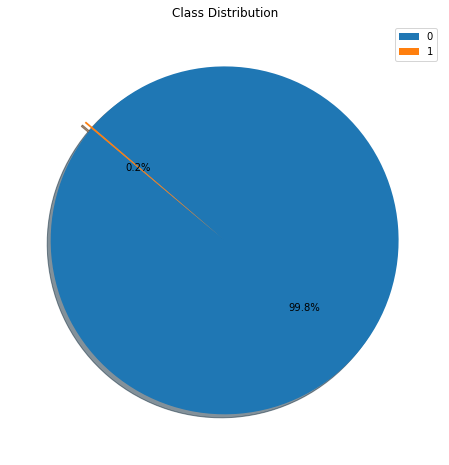

In [16]:
%matplotlib inline
plt.figure(figsize=(8,8))
explode = [0,0.05]
plt.pie(df[target].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');
# px.pie(df, values=df[target].value_counts(), names=(df[target].value_counts()).index, title=f"Target: {target}").show();
# df[target].value_counts().iplot(kind="bar", title = f"Target: {target}")

Note: We have a severe imbalanced dataset! We must focus on fraudulent transactions, which are the more important than reliables. If we use this dataset directly, ML algorithms might go overfit. They could predict the reliable transactions maybe perfect, but fraudulent one couldn't.

In [17]:
df.groupby(target).mean()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94835.058,0.013,-0.010,0.013,-0.010,0.007,0.001,0.010,-0.002,0.003,0.008,-0.006,0.009,0.001,0.012,0.001,0.008,0.011,0.005,-0.001,-0.000,-0.001,-0.000,0.000,0.000,-0.000,0.000,0.001,0.000,88.414
1,80450.514,-4.498,3.406,-6.730,4.473,-2.957,-1.433,-5.176,0.953,-2.522,-5.453,3.716,-6.103,-0.094,-6.836,-0.073,-4.001,-6.463,-2.157,0.669,0.405,0.467,0.087,-0.096,-0.107,0.041,0.050,0.214,0.078,123.872


In [18]:
cprint('Descriptive statistics according to the "class==1, Fraudulent"',"blue","on_grey", attrs=["bold"])
df[df[target] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

Descriptive statistics according to the "class==1, Fraudulent"


,count,mean,std,min,25%,50%,75%,max
time,473.000000,80450.513742,48636.179973,406.000000,41203.000000,73408.000000,129095.000000,170348.000000
v1,473.000000,-4.498280,6.593145,-30.552380,-5.603690,-2.271755,-0.361428,2.132386
v2,473.000000,3.405965,4.122500,-8.402154,1.145381,2.617105,4.571743,22.057729
v3,473.000000,-6.729599,6.909647,-31.103685,-7.926507,-4.875397,-2.171454,2.250210
v4,473.000000,4.472591,2.871523,-1.313275,2.288644,4.100098,6.290918,12.114672
v5,473.000000,-2.957197,5.278831,-22.105532,-4.278983,-1.372245,0.260821,11.095089
v6,473.000000,-1.432518,1.715347,-6.406267,-2.450444,-1.420468,-0.413647,6.474115
v7,473.000000,-5.175912,6.858024,-43.557242,-6.989195,-2.902079,-0.907188,5.802537
v8,473.000000,0.953255,5.585950,-41.044261,-0.161518,0.617738,1.709417,20.007208
v9,473.000000,-2.522124,2.465047,-13.434066,-3.796760,-2.099049,-0.788388,3.353525


In [19]:
cprint('Descriptive statistics according to the "class==0, Reliable"',"blue","on_grey", attrs=["bold"])
df[df[target] == 0].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

Descriptive statistics according to the "class==0, Reliable"


,count,mean,std,min,25%,50%,75%,max
time,283253.000000,94835.058093,47475.550607,0.000000,54233.000000,84711.000000,139308.000000,172792.000000
v1,283253.000000,0.013439,1.922179,-56.407510,-0.913431,0.022562,1.316788,2.454930
v2,283253.000000,-0.009829,1.633520,-72.715728,-0.601398,0.062561,0.797012,18.902453
v3,283253.000000,0.012853,1.457593,-48.325589,-0.883966,0.182247,1.028261,9.382558
v4,283253.000000,-0.010440,1.398575,-5.683171,-0.851605,-0.024500,0.734231,16.875344
v5,283253.000000,0.006769,1.355816,-113.743307,-0.687888,-0.052807,0.612442,34.801666
v6,283253.000000,0.001251,1.329914,-26.160506,-0.767543,-0.274172,0.397678,73.301626
v7,283253.000000,0.010447,1.177480,-31.764946,-0.550146,0.041664,0.571029,120.589494
v8,283253.000000,-0.002448,1.157140,-73.216718,-0.208841,0.021633,0.324473,18.709255
v9,283253.000000,0.002613,1.086902,-6.290730,-0.641649,-0.051368,0.596969,15.594995


#### Features

In [20]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

##### 1- "time"

In [21]:
feature_col = "time"
cprint(f"Have a first look to {feature_col}","blue","on_grey", attrs=["bold"])
summary(feature_col)

Have a first look to time
Column:  time
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  124592
****************************************************************************************************
Value counts: 
3767.000      21
3770.000      20
3750.000      19
19912.000     19
3766.000      17
              ..
4919.000       1
119950.000     1
56235.000      1
93647.000      1
151841.000     1
Name: time, Length: 124592, dtype: int64
****************************************************************************************************


In [22]:
# pd.crosstab(df['time'], df[target]).iplot(kind='bar', title = 'time and target')

##### 2- "amount"

In [23]:
feature_col = "amount"
cprint(f"Have a first look to {feature_col}","blue","on_grey", attrs=["bold"])
summary(feature_col)

Have a first look to amount
Column:  amount
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  32767
****************************************************************************************************
Value counts: 
1.000       13566
1.980        6044
0.890        4871
9.990        4738
15.000       3280
            ...  
362.970         1
241.710         1
462.780         1
337.410         1
1080.060        1
Name: amount, Length: 32767, dtype: int64
****************************************************************************************************


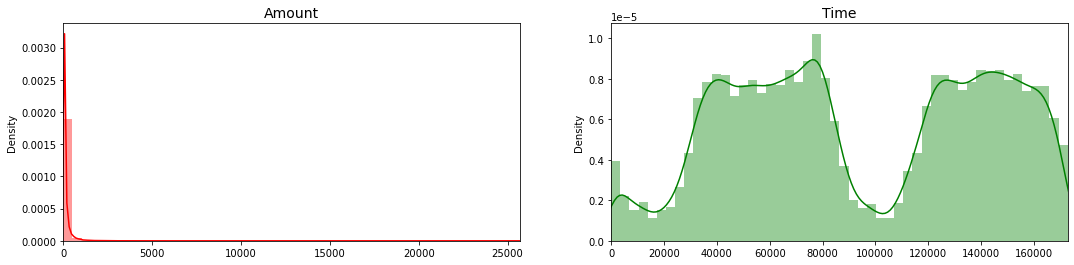

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df['amount'].values, ax=ax[0], color='r')
ax[0].set_title('Amount', fontsize=14)
ax[0].set_xlim([min(df['amount'].values), max(df['amount'].values)])

sns.distplot(df['time'].values, ax=ax[1], color='g')
ax[1].set_title('Time', fontsize=14)
ax[1].set_xlim([min(df['time'].values), max(df['time'].values)])

plt.show();
# ref: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook

##### 3- All "v" values

In [25]:
df_skeweds = df.drop([target, "amount"], axis=1).skew()[abs(df.skew()) > 0.8]  
# 0.75 is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
df_skeweds

v1    -3.273
v2    -4.695
v3    -2.152
v5    -2.414
v6     1.830
v7     2.890
v8    -8.311
v10    1.253
v12   -2.199
v14   -1.919
v16   -1.051
v17   -3.690
v20   -2.043
v21    2.820
v23   -5.867
v28   11.555
dtype: float64

#### 1.1.3.2 Correlation

In [26]:
def color(val):
    if val > 0.8 and val < 0.99:
        color = 'red'
    elif val == 1:
        color = "white"
    else:
        color = 'black'
    return f'color: {color}'

df.corr().style.applymap(color)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
v1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
v2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
v3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
v4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
v5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
v6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
v7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
v8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
v9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


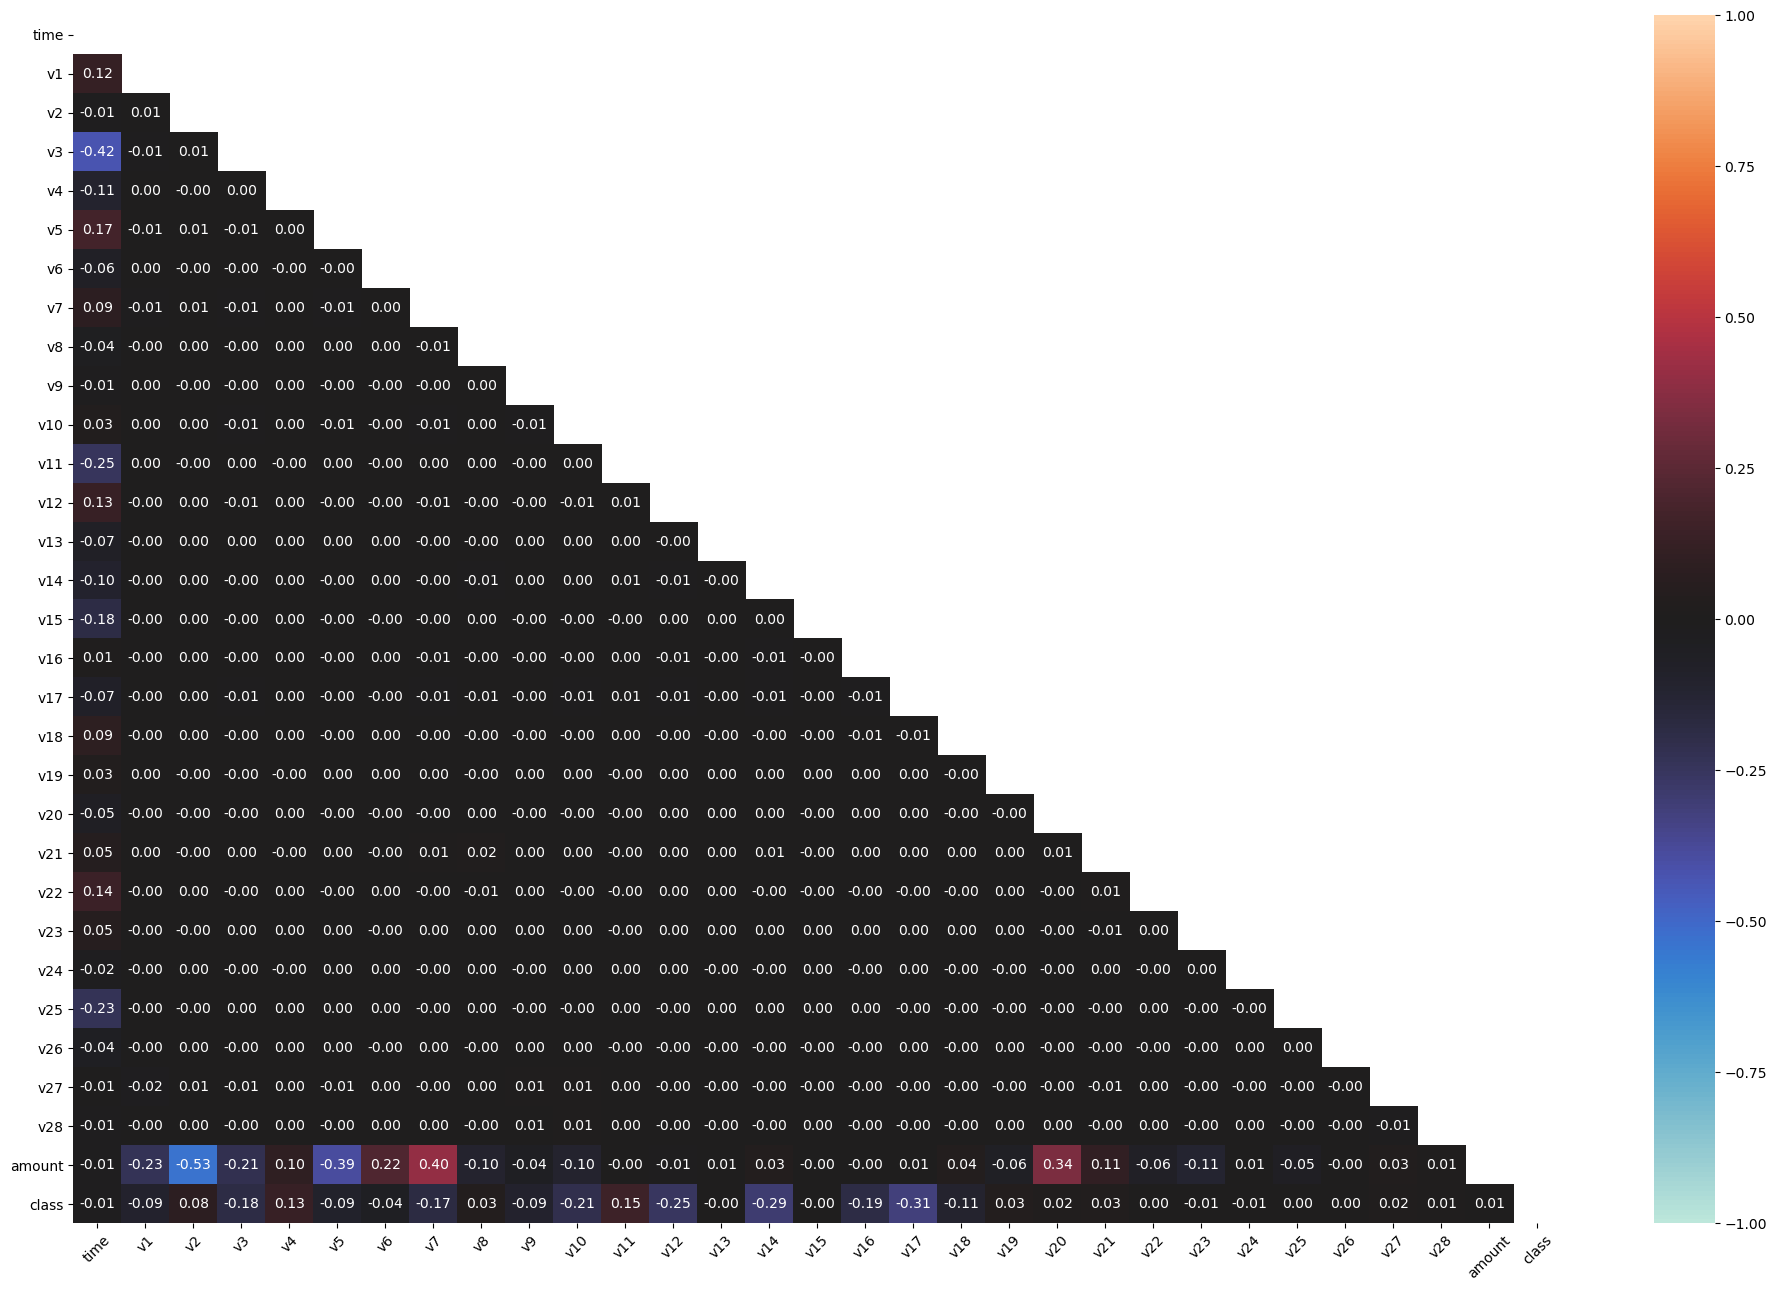

In [27]:
%matplotlib inline
matrix = np.triu(df.corr())
fig,ax = plt.subplots(figsize=(24, 16),dpi=100)
sns.heatmap (df.corr(), annot=True, ax=ax, fmt='.2f', vmin=-1, vmax=1, center=0,mask=matrix)
plt.xticks(rotation = 45);

#### 1.1.3.2 Multicolinearity Control

In [28]:
multicolinearity_control(df)

There is NO multicollinearity problem.


In [29]:
#feature==collinear

In [30]:
# df_fetaure = pd.DataFrame({'feature':feature,'collinear':collinear})
# df_fetaure

## 1.2 Exploratory Data Analysis

### 1.2.1 Handle with Skewness

In [31]:
df_skeweds = df.drop(target, axis=1).skew()[abs(df.skew()) > 0.8]  
# 0.75 is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
df_skeweds

v1       -3.273
v2       -4.695
v3       -2.152
v5       -2.414
v6        1.830
v7        2.890
v8       -8.311
v10       1.253
v12      -2.199
v14      -1.919
v16      -1.051
v17      -3.690
v20      -2.043
v21       2.820
v23      -5.867
v28      11.555
amount   16.979
dtype: float64

In [32]:
for i in df_skeweds:
    if abs(0.75<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

Skewness: -3.27, highly skewed.
Skewness: -4.7, highly skewed.
Skewness: -2.15, highly skewed.
Skewness: -2.41, highly skewed.
Skewness: 1.83, highly skewed.
Skewness: 2.89, highly skewed.
Skewness: -8.31, highly skewed.
Skewness: 1.25, moderately skewed.
Skewness: -2.2, highly skewed.
Skewness: -1.92, highly skewed.
Skewness: -3.69, highly skewed.
Skewness: -2.04, highly skewed.
Skewness: 2.82, highly skewed.
Skewness: -5.87, highly skewed.
Skewness: 11.56, highly skewed.
Skewness: 16.98, highly skewed.


##### Handling with Skewness with Log Method

In [33]:
df_log = df[df_skeweds.index]
for i in df_skeweds.index:
    df_log[i] = df_log[i].apply(np.log1p)
df_log.skew()

v1       -1.660
v2       -1.832
v3       -2.103
v5       -1.613
v6       -1.058
v7       -1.863
v8       -1.639
v10      -1.643
v12      -2.437
v14      -2.171
v16      -2.143
v17      -1.670
v20      -1.316
v21      -1.325
v23      -2.096
v28      -5.275
amount    0.161
dtype: float64

In [34]:
for i in df_log.skew():
    if abs(0.75<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

Skewness: -1.66, highly skewed.
Skewness: -1.83, highly skewed.
Skewness: -2.1, highly skewed.
Skewness: -1.61, highly skewed.
Skewness: -1.86, highly skewed.
Skewness: -1.64, highly skewed.
Skewness: -1.64, highly skewed.
Skewness: -2.44, highly skewed.
Skewness: -2.17, highly skewed.
Skewness: -2.14, highly skewed.
Skewness: -1.67, highly skewed.
Skewness: -2.1, highly skewed.
Skewness: -5.27, highly skewed.


##### Handling with Skewness with Power Transformer Method

In [35]:
df_trans = PowerTransformer(method='yeo-johnson').fit_transform(df[df_skeweds.index])
df_trans = pd.DataFrame(df_trans, columns=df_skeweds.index)
df_trans.skew()

v1       -0.219
v2        0.336
v3       -0.079
v5       -1.220
v6       -1.942
v7        2.435
v8        2.361
v10      -1.245
v12       0.157
v14       0.100
v16       0.136
v17      -0.827
v20      -0.933
v21      -1.955
v23      -0.271
v28       0.910
amount    0.018
dtype: float64

In [36]:
for i in df_trans.skew():
    if abs(0.75<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

Skewness: -1.94, highly skewed.
Skewness: 2.43, highly skewed.
Skewness: 2.36, highly skewed.
Skewness: -1.96, highly skewed.
Skewness: 0.91, moderately skewed.


In [37]:
# df_trans.head(5)

In [38]:
# df.head(5)

In [39]:
df_ = pd.merge(df[df.columns.difference(df_trans.columns)], df_trans, on=df.index)

In [40]:
df_ = df_[df.columns]
df_.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.000,-0.909,-0.131,2.174,1.378,-0.257,0.460,0.196,0.023,0.364,0.132,-0.552,-0.775,-0.991,-0.405,1.468,-0.602,0.219,0.026,0.404,0.324,-0.009,0.278,-0.190,0.067,0.129,-0.189,0.134,-0.055,1.118,0
1,0.000,0.626,0.095,-0.034,0.448,0.031,0.047,-0.064,0.009,-0.255,-0.113,1.613,1.301,0.489,-0.232,0.636,0.492,-0.174,-0.183,-0.146,-0.094,-0.303,-0.639,0.153,-0.340,0.167,0.126,-0.009,0.057,-1.129,0
2,1.000,-0.908,-0.874,1.381,0.380,-0.376,1.322,0.644,0.176,-1.515,0.241,0.625,-0.104,0.717,-0.255,2.346,-2.824,1.388,-0.121,-2.262,0.681,0.361,0.772,1.503,-0.689,-0.328,-0.139,-0.055,-0.177,1.622,0
3,1.000,-0.746,-0.203,1.401,-0.863,-0.020,0.984,0.194,0.314,-1.387,-0.005,-0.226,0.029,0.508,-0.382,-0.631,-1.198,-0.833,1.966,-1.233,-0.274,-0.136,0.005,-0.318,-1.176,0.647,-0.222,0.063,0.202,1.011,0
4,2.000,-0.827,0.536,1.161,0.403,-0.307,0.188,0.483,-0.333,0.818,0.730,-0.823,0.499,1.346,-1.174,0.175,-0.582,-0.319,-0.038,0.803,0.529,0.003,0.798,-0.233,0.141,-0.206,0.502,0.219,0.674,0.692,0


In [41]:
df_.shape

(283726, 31)

## 1.3 Data Cleaning
Check Missing Values and Outliers

In [42]:
missing_values(df_)
# there are no missing values

,Missing_Number,Missing_Percent


---
---


# 2. Data Preprocessing

## 2.1 Train-Test Split|Scale|Dummy 

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

### Scaling

In [43]:
df_['amount'] = RobustScaler().fit_transform(df_['amount'].values.reshape(-1,1))
df_['time'] = RobustScaler().fit_transform(df_['time'].values.reshape(-1,1))

In [44]:
df_.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,-0.995,-0.909,-0.131,2.174,1.378,-0.257,0.460,0.196,0.023,0.364,0.132,-0.552,-0.775,-0.991,-0.405,1.468,-0.602,0.219,0.026,0.404,0.324,-0.009,0.278,-0.190,0.067,0.129,-0.189,0.134,-0.055,0.727,0
1,-0.995,0.626,0.095,-0.034,0.448,0.031,0.047,-0.064,0.009,-0.255,-0.113,1.613,1.301,0.489,-0.232,0.636,0.492,-0.174,-0.183,-0.146,-0.094,-0.303,-0.639,0.153,-0.340,0.167,0.126,-0.009,0.057,-0.769,0
2,-0.995,-0.908,-0.874,1.381,0.380,-0.376,1.322,0.644,0.176,-1.515,0.241,0.625,-0.104,0.717,-0.255,2.346,-2.824,1.388,-0.121,-2.262,0.681,0.361,0.772,1.503,-0.689,-0.328,-0.139,-0.055,-0.177,1.063,0
3,-0.995,-0.746,-0.203,1.401,-0.863,-0.020,0.984,0.194,0.314,-1.387,-0.005,-0.226,0.029,0.508,-0.382,-0.631,-1.198,-0.833,1.966,-1.233,-0.274,-0.136,0.005,-0.318,-1.176,0.647,-0.222,0.063,0.202,0.656,0
4,-0.995,-0.827,0.536,1.161,0.403,-0.307,0.188,0.483,-0.333,0.818,0.730,-0.823,0.499,1.346,-1.174,0.175,-0.582,-0.319,-0.038,0.803,0.529,0.003,0.798,-0.233,0.141,-0.206,0.502,0.219,0.674,0.443,0


In [45]:
df_.shape

(283726, 31)

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

_X_ = df_.drop(target, axis=1)
_y_ = df_[target]

for train_index, test_index in StratifiedKFold(n_splits=5, random_state=42, shuffle=False).split(_X_, _y_):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = _X_.iloc[train_index], _X_.iloc[test_index]
    original_ytrain, original_ytest = _y_.iloc[train_index], _y_.iloc[test_index]

Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]
Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]
Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]


In [47]:
print(original_Xtrain.shape)
print(original_ytrain.shape)
print(original_Xtest.shape)
print(original_ytest.shape)

(226981, 30)
(226981,)
(56745, 30)
(56745,)


In [48]:
original_Xtrain.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-0.995,-0.909,-0.131,2.174,1.378,-0.257,0.460,0.196,0.023,0.364,0.132,-0.552,-0.775,-0.991,-0.405,1.468,-0.602,0.219,0.026,0.404,0.324,-0.009,0.278,-0.190,0.067,0.129,-0.189,0.134,-0.055,0.727
1,-0.995,0.626,0.095,-0.034,0.448,0.031,0.047,-0.064,0.009,-0.255,-0.113,1.613,1.301,0.489,-0.232,0.636,0.492,-0.174,-0.183,-0.146,-0.094,-0.303,-0.639,0.153,-0.340,0.167,0.126,-0.009,0.057,-0.769
2,-0.995,-0.908,-0.874,1.381,0.380,-0.376,1.322,0.644,0.176,-1.515,0.241,0.625,-0.104,0.717,-0.255,2.346,-2.824,1.388,-0.121,-2.262,0.681,0.361,0.772,1.503,-0.689,-0.328,-0.139,-0.055,-0.177,1.063
3,-0.995,-0.746,-0.203,1.401,-0.863,-0.020,0.984,0.194,0.314,-1.387,-0.005,-0.226,0.029,0.508,-0.382,-0.631,-1.198,-0.833,1.966,-1.233,-0.274,-0.136,0.005,-0.318,-1.176,0.647,-0.222,0.063,0.202,0.656
4,-0.995,-0.827,0.536,1.161,0.403,-0.307,0.188,0.483,-0.333,0.818,0.730,-0.823,0.499,1.346,-1.174,0.175,-0.582,-0.319,-0.038,0.803,0.529,0.003,0.798,-0.233,0.141,-0.206,0.502,0.219,0.674,0.443


In [49]:

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [50]:
original_Xtrain 

array([[-0.99529046, -0.90851662, -0.13110928, ...,  0.13355838,
        -0.05517531,  0.72731946],
       [-0.99529046,  0.62575444,  0.0949148 , ..., -0.0089831 ,
         0.05655694, -0.7692266 ],
       [-0.99527871, -0.90794139, -0.8739653 , ..., -0.05535279,
        -0.17660489,  1.06337784],
       ...,
       [ 0.71158993, -0.20071625, -0.38314767, ..., -0.0446174 ,
        -0.02909041, -0.62437241],
       [ 0.71158993,  1.41909265, -0.31986396, ..., -0.08303157,
        -0.18140265,  0.04855785],
       [ 0.71160168, -0.0652001 ,  0.71676685, ...,  0.21638523,
         0.94439098, -1.09870599]])

Since all "v" values has already been scaled during PCA we will scale only amount and time features. Due to the severe imbalance dataset case, there is no matter in scaling before train-test split, because we will in any case undersample the dataset. And we will perform RobustScaler, because that is less prone to outliers.

In [51]:
X__ = df_.drop(target, axis=1).astype('float64')
y__ = df_[target]

X_, y_ = RandomUnderSampler(random_state=42).fit_resample(X__, y__)

undersampled_df = pd.concat([X_, y_], axis=1)
undersampled_df[target].value_counts()

1    473
0    473
Name: class, dtype: int64

In [52]:
undersampled_df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.958,-0.242,0.511,-0.038,-0.799,0.498,-0.369,0.759,-0.137,-0.350,-0.199,0.505,1.117,0.471,0.133,-1.128,0.153,-0.995,-0.185,0.350,0.014,-0.308,-0.491,-0.010,-0.400,-0.452,0.143,0.246,0.272,-0.782,0
1,-0.256,0.638,0.111,0.426,0.746,-0.505,-1.051,0.112,-0.346,-0.106,-0.042,0.389,1.107,0.974,0.059,0.912,0.055,-0.360,-0.806,-0.328,-0.060,-0.278,-0.590,0.291,0.934,0.168,0.058,-0.025,0.097,-0.265,0
2,-0.517,-0.417,0.714,0.600,-0.136,0.300,-0.314,0.559,-0.090,-0.323,-0.449,-0.978,-0.589,0.167,-0.555,0.966,0.712,-0.382,0.146,0.226,0.165,-0.440,-0.851,-0.209,-0.509,-0.053,0.124,0.245,0.288,-0.894,0
3,0.197,1.193,-0.277,-1.340,0.192,0.393,-0.854,0.614,-0.572,1.236,-0.224,1.846,-1.416,1.854,3.037,-0.954,-0.485,0.120,0.221,0.193,0.076,0.126,0.252,-0.279,-0.393,0.277,0.122,-0.135,-0.204,0.746,0
4,-0.339,-1.326,1.594,0.334,0.584,-0.494,0.269,0.169,0.270,0.752,1.444,0.533,0.592,-0.516,-0.263,-0.548,-0.580,-0.202,0.279,1.229,0.212,-0.254,-0.239,-0.198,-0.025,-0.158,-0.669,-1.507,-2.391,0.169,0


# Outlier

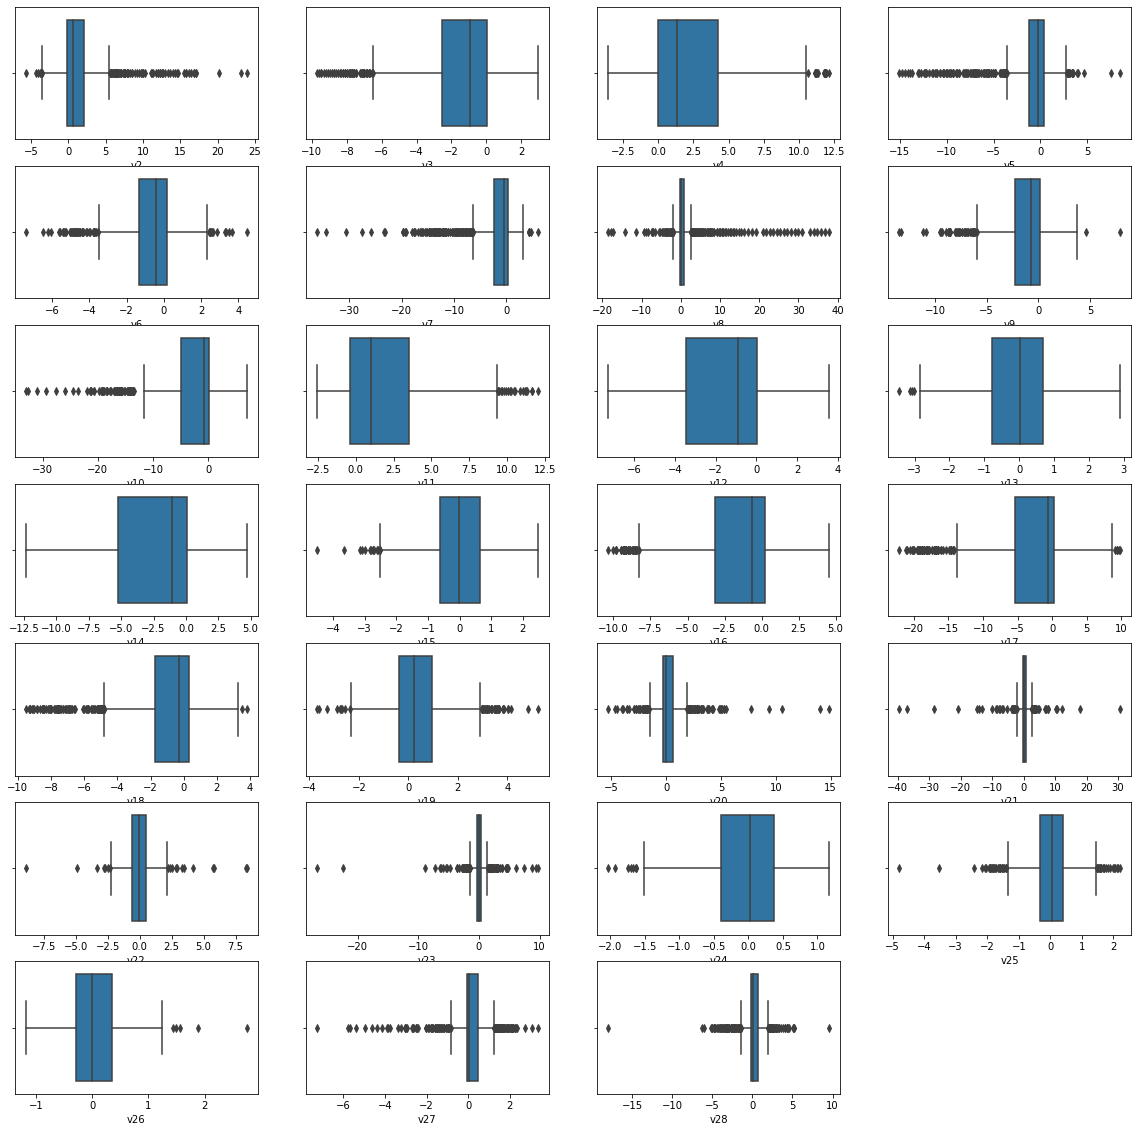

In [53]:
%matplotlib inline
index = 0
plt.figure(figsize=(20,20))
for feature in undersampled_df.columns[2:29]:
    index += 1
    plt.subplot(7,4,index)
    sns.boxplot(x=feature, data=undersampled_df, whis=1.5)

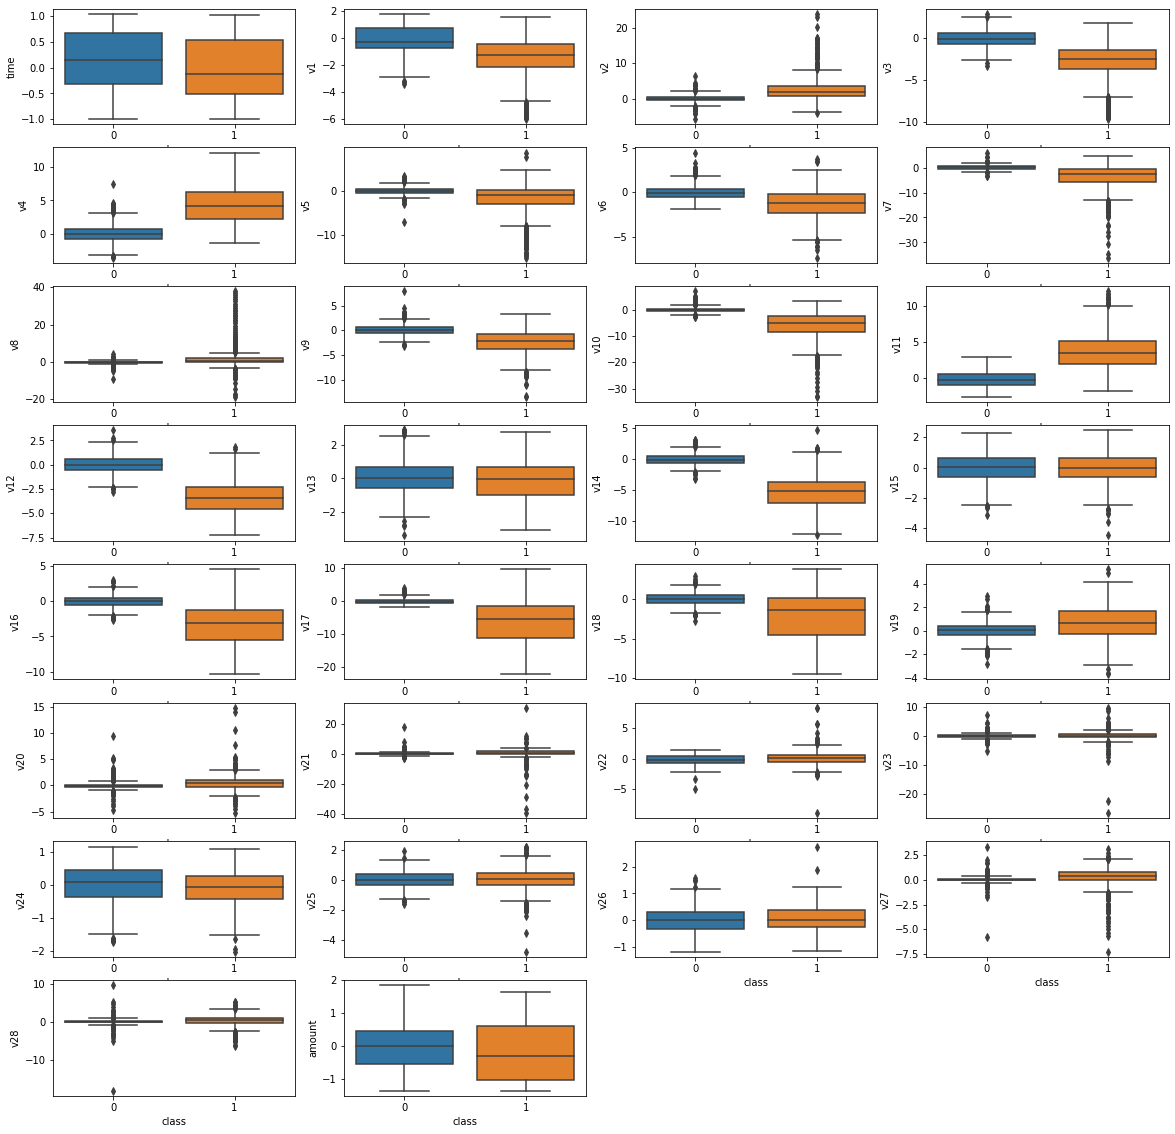

In [54]:
index = 0
plt.figure(figsize=(20,20))
for feature in undersampled_df.columns[:30]:
    index += 1
    plt.subplot(8,4,index)
    sns.boxplot(y = feature, x = "class", data = undersampled_df, whis=1.5)

In [55]:
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

In [56]:
'''This function detects the best z-score for outlier detection in the specified column.'''

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.05, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
    
    df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(lambda x : x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), colors="r", ls = ":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                          IQR_coef,
                                                                          outlier_limit,
                                                                          num_outlier,     
                                                                          (np.round(percentile_threshold, 3), 
                                                                           np.round(100-percentile_threshold, 3))),
                                                                          (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

In [57]:
'''This function plots histogram, boxplot and z-score/outlier graphs for the specified column.'''

def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

In [58]:
undersampled_df.columns[1:30]

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'],
      dtype='object')

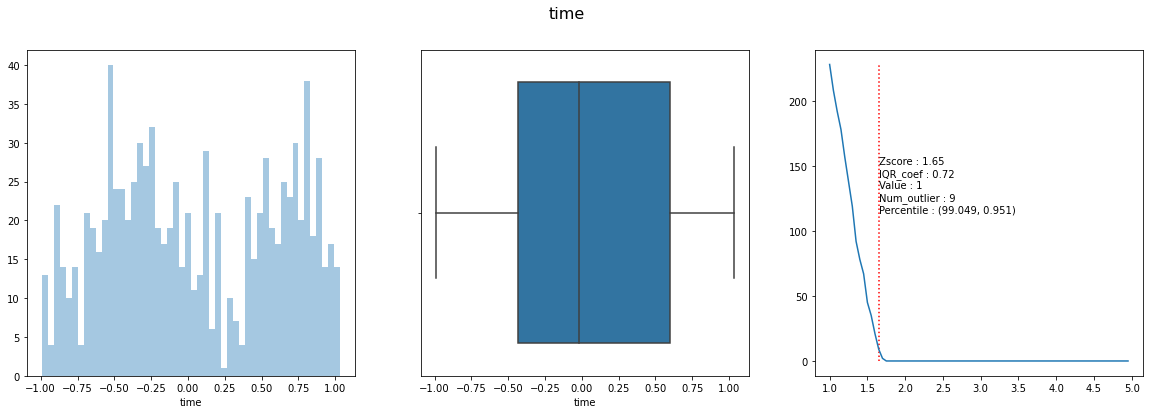

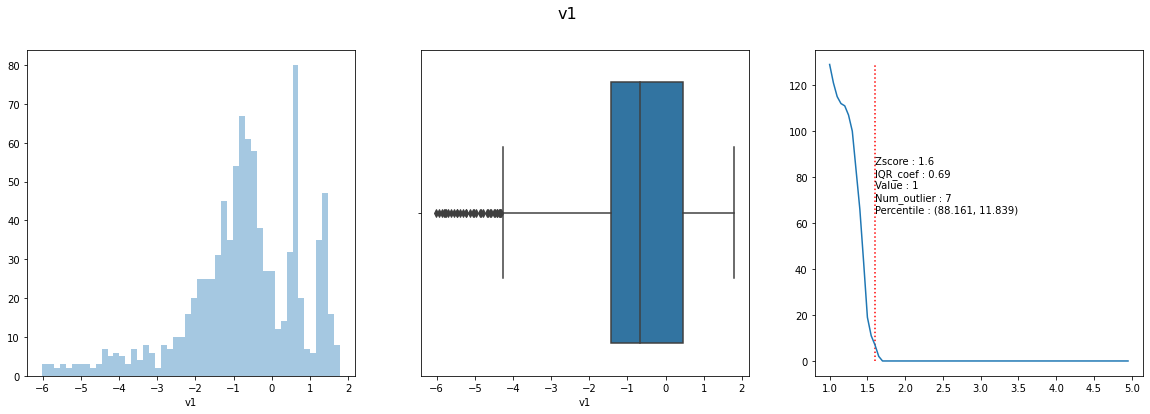

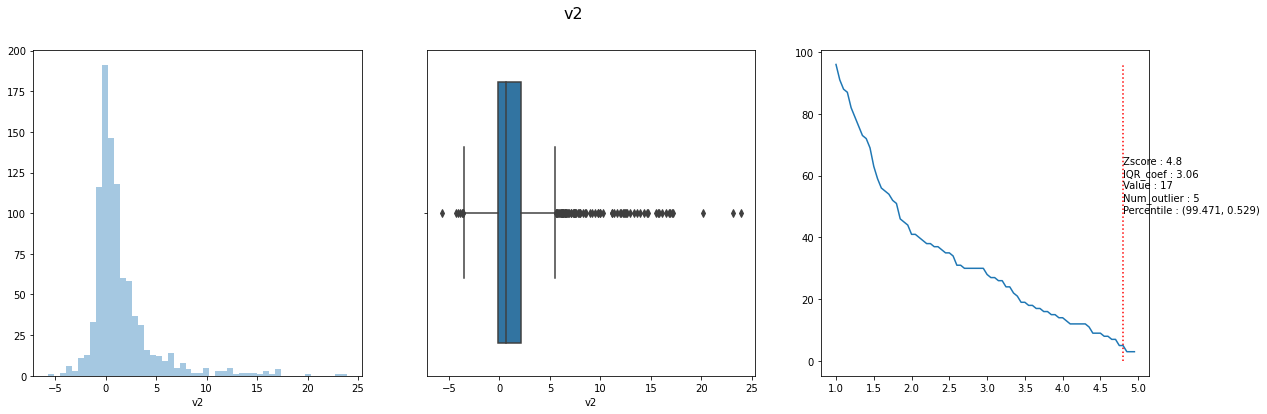

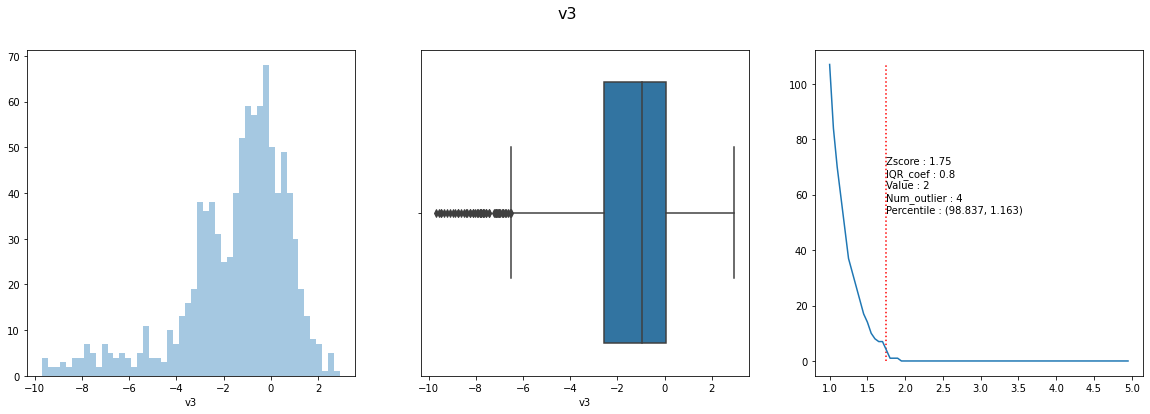

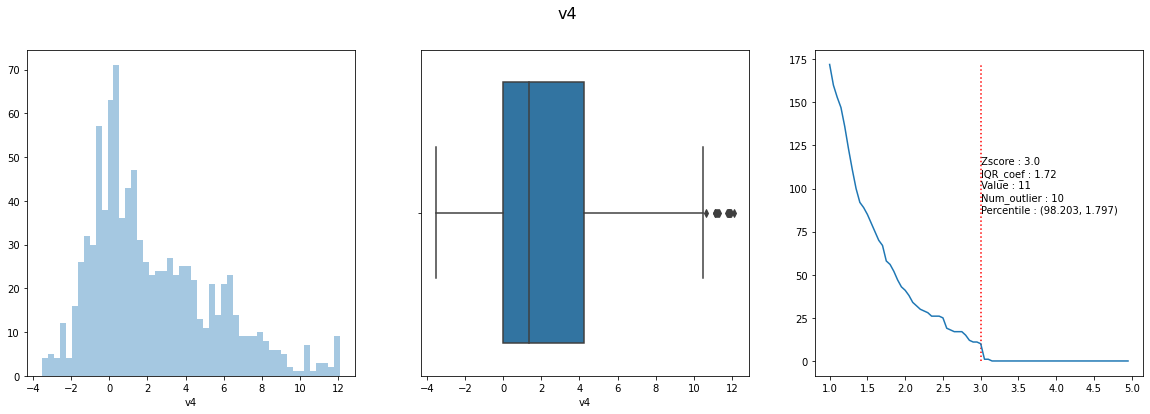

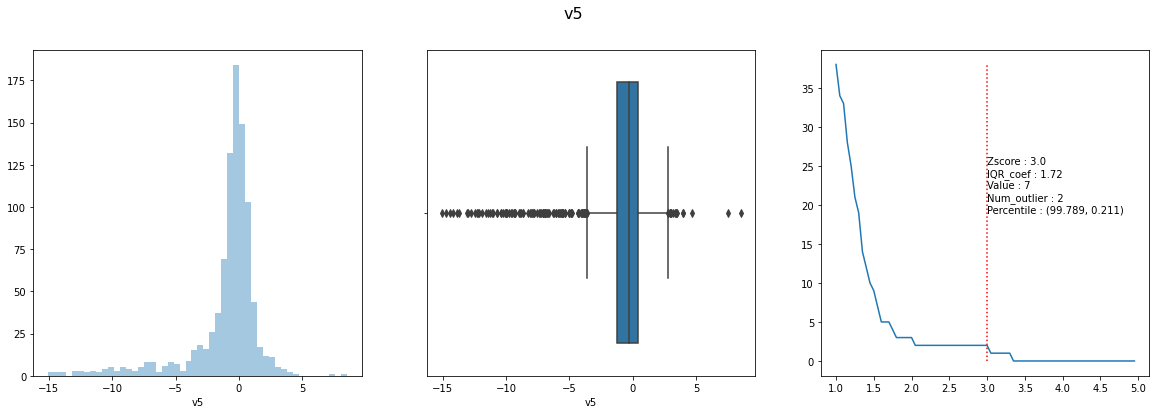

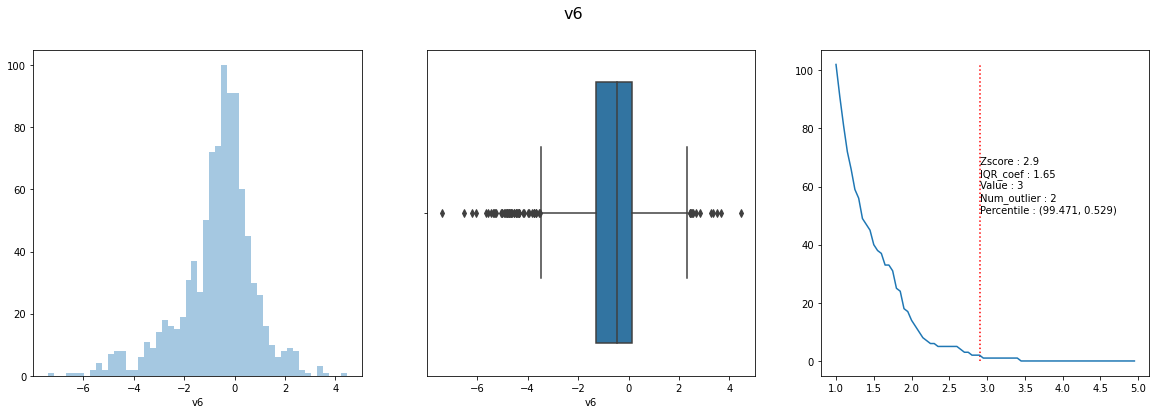

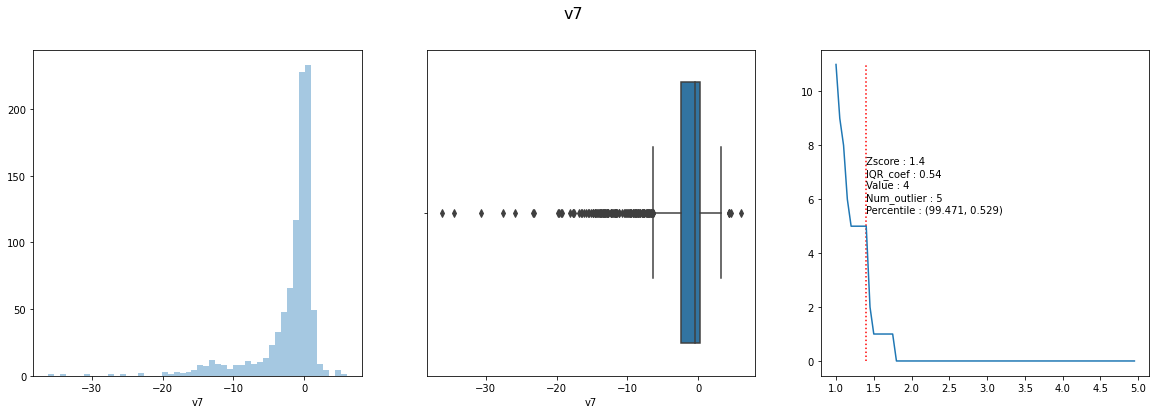

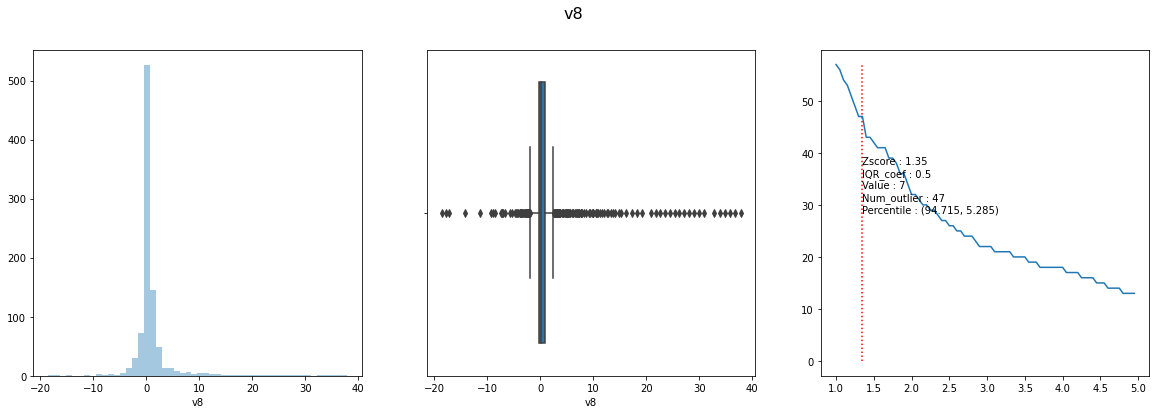

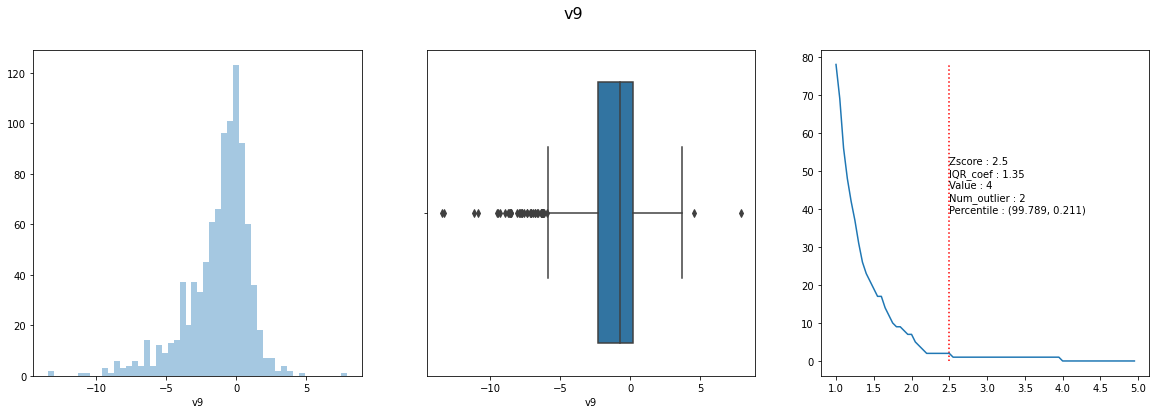

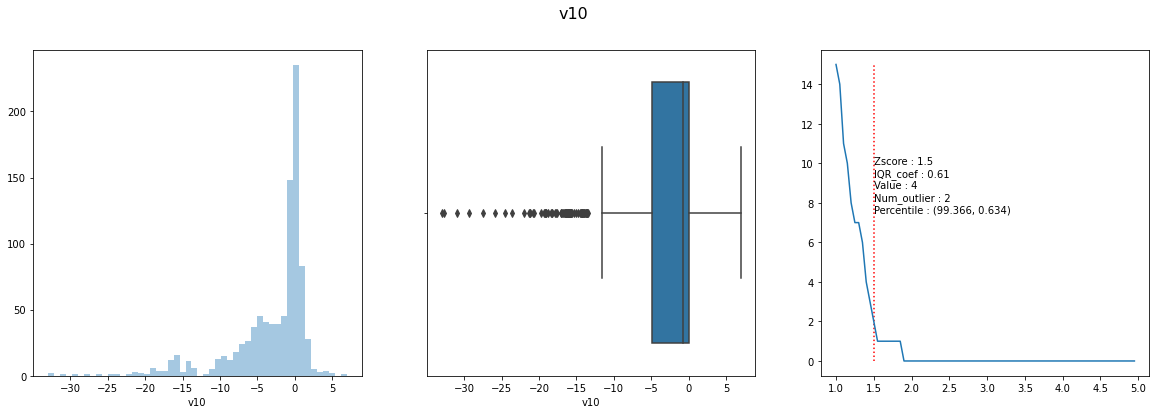

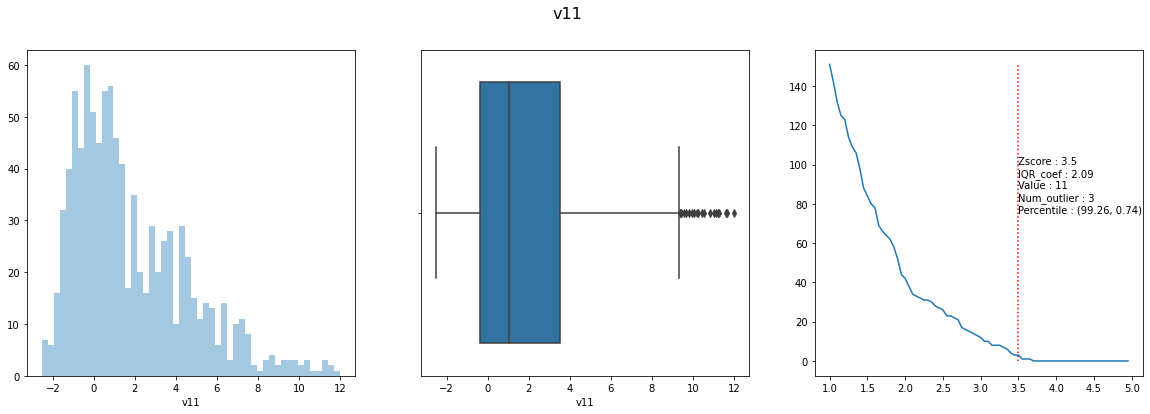

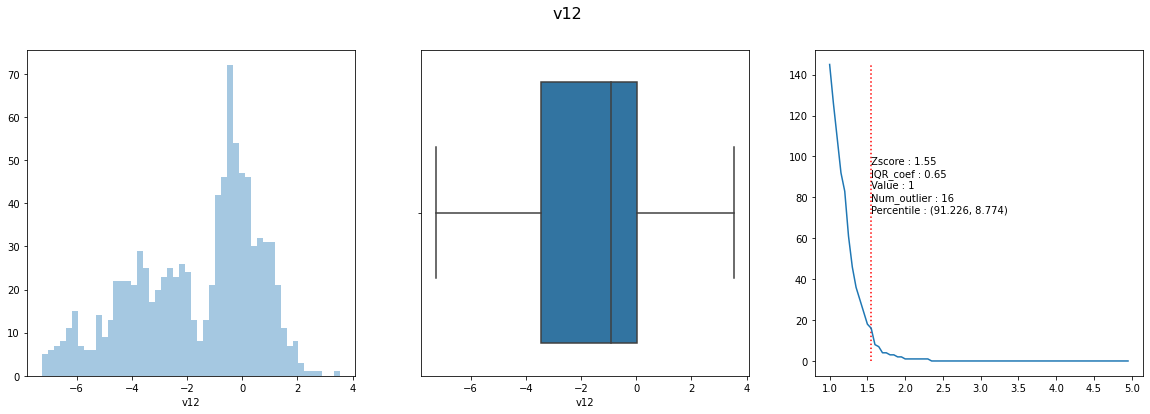

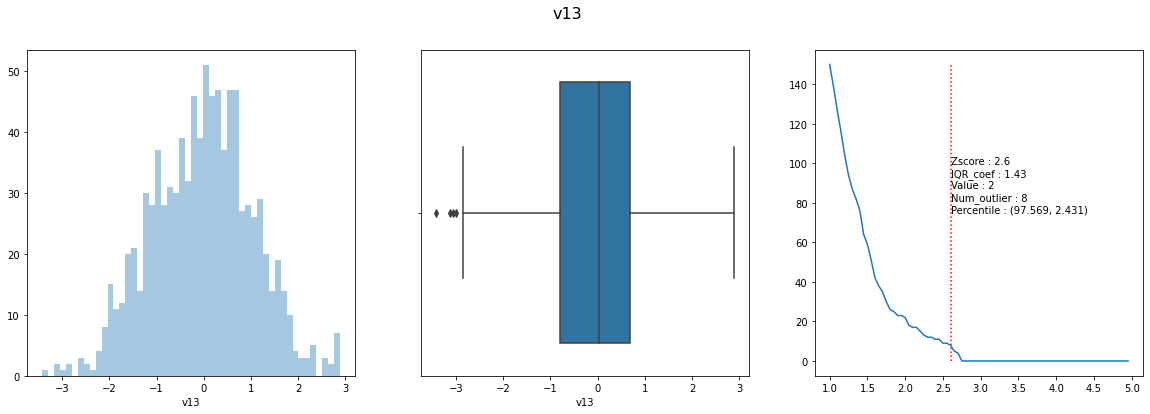

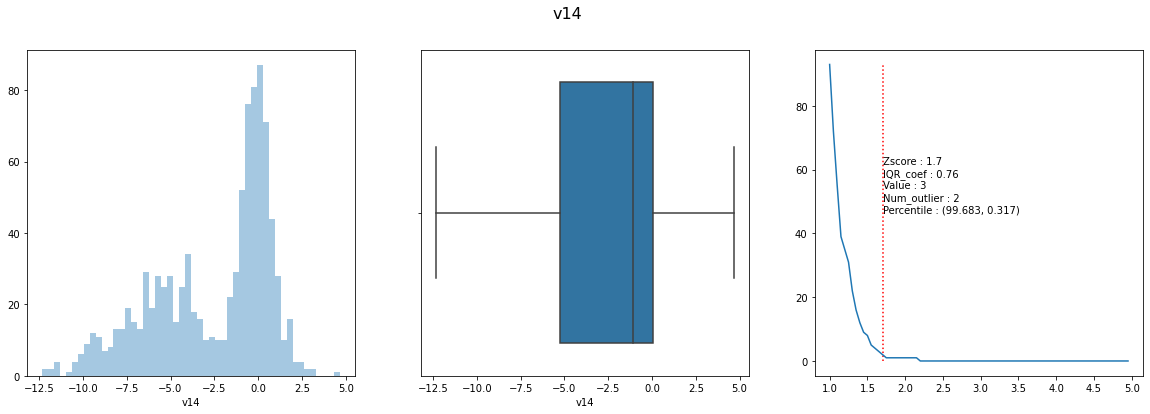

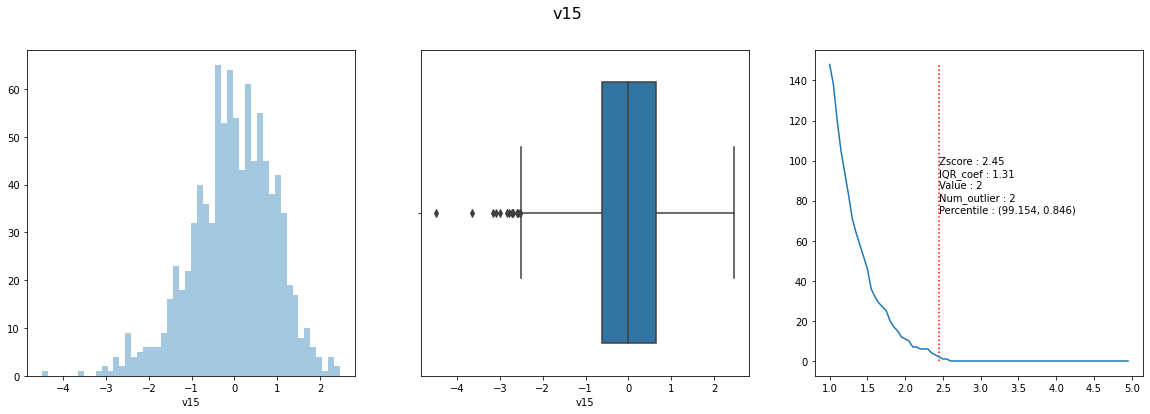

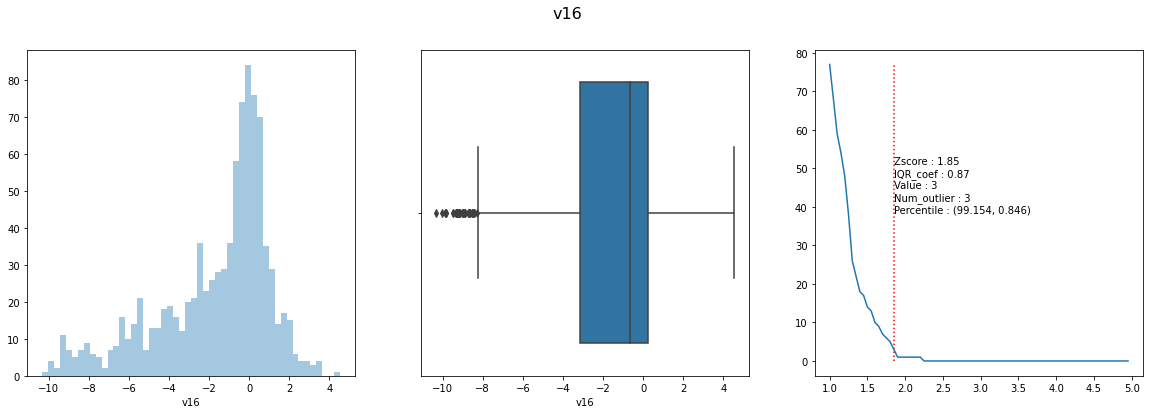

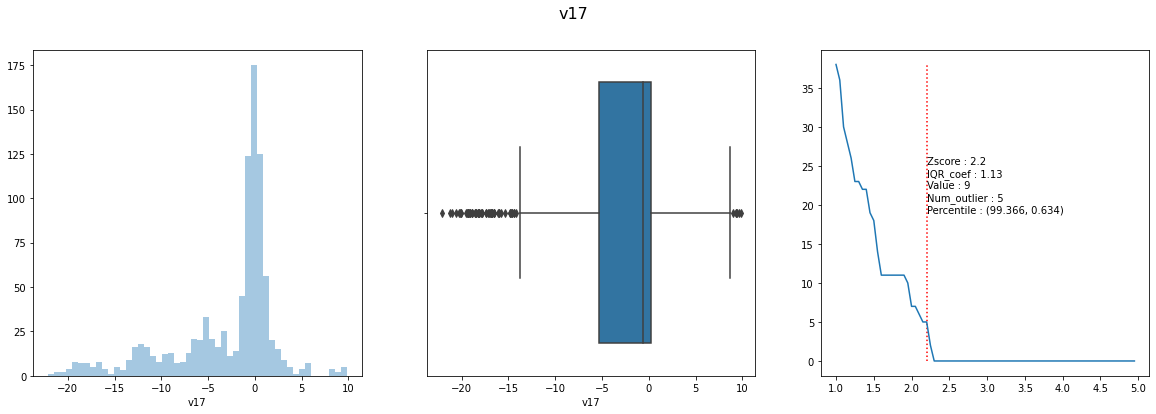

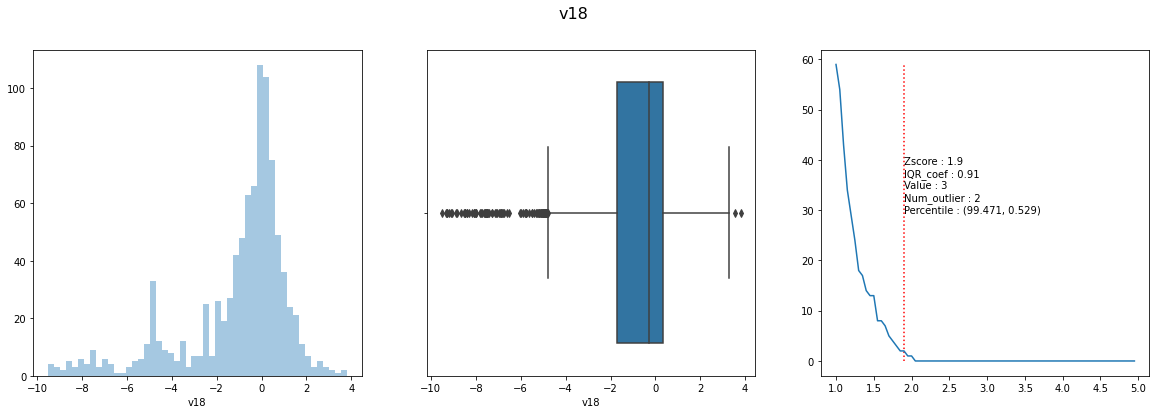

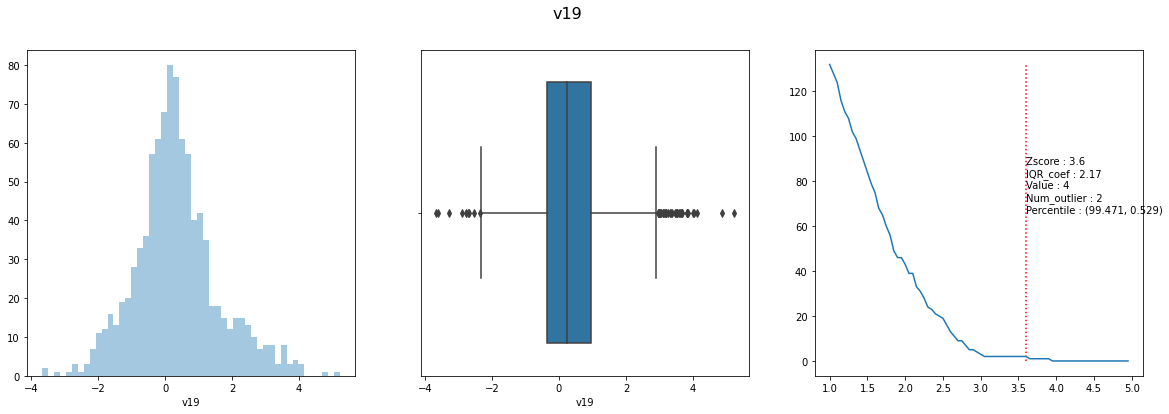

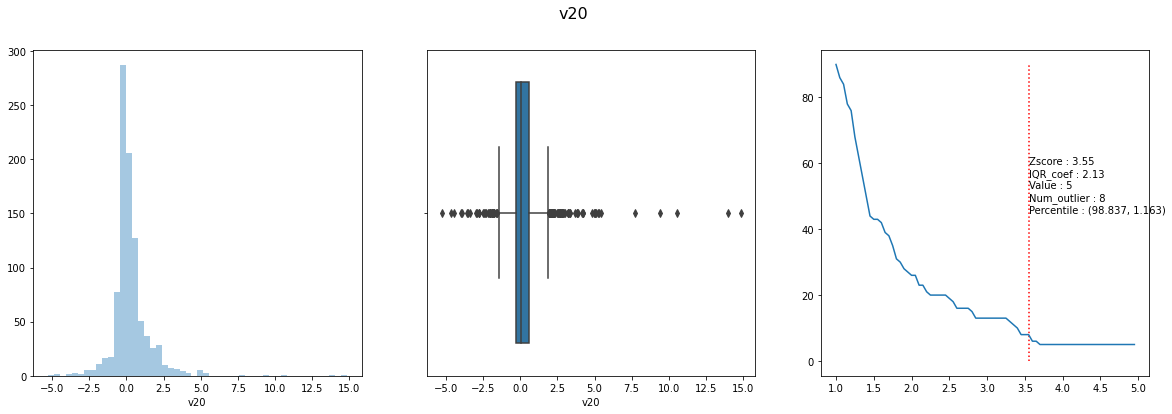

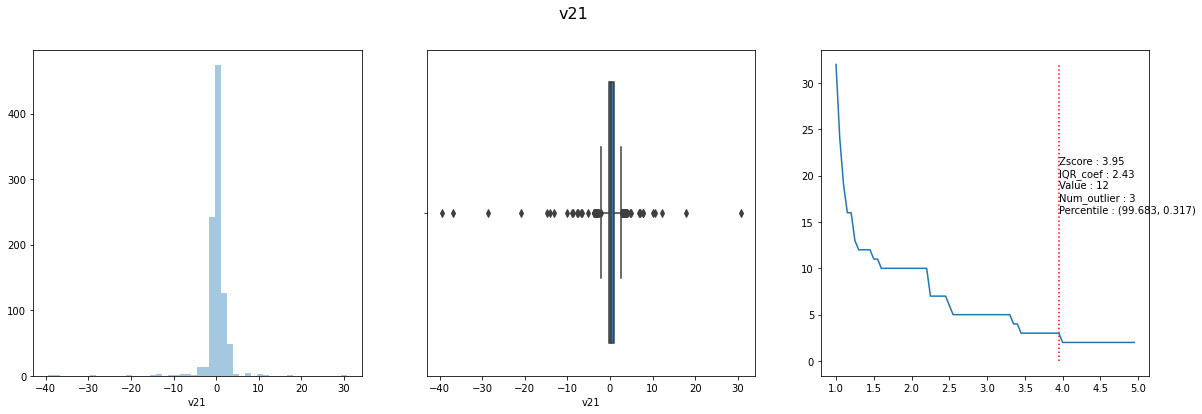

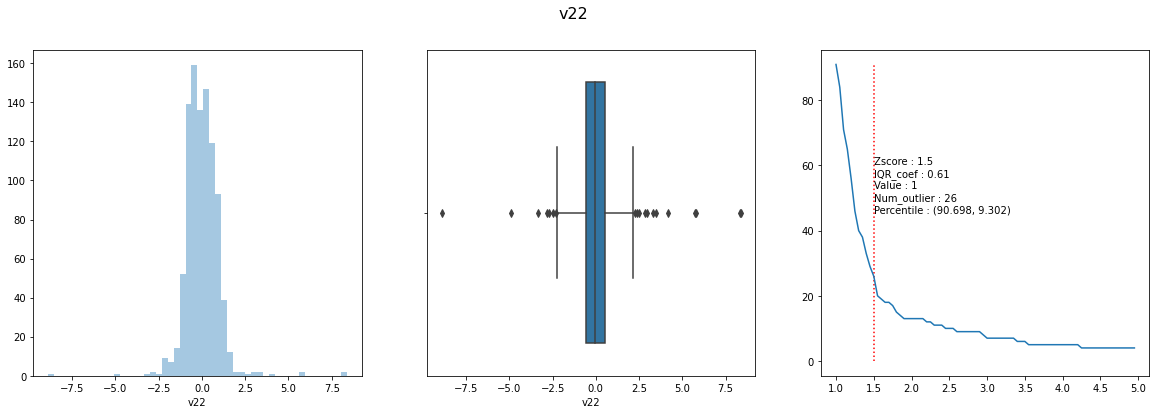

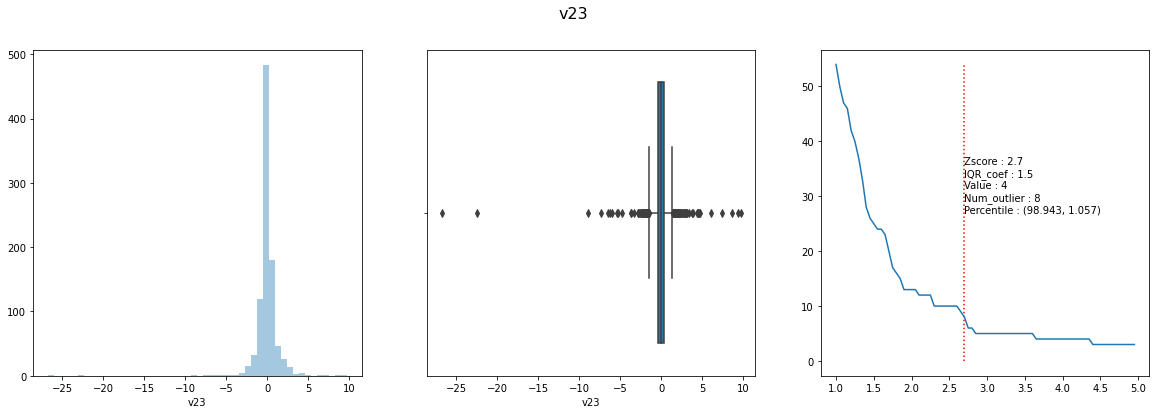

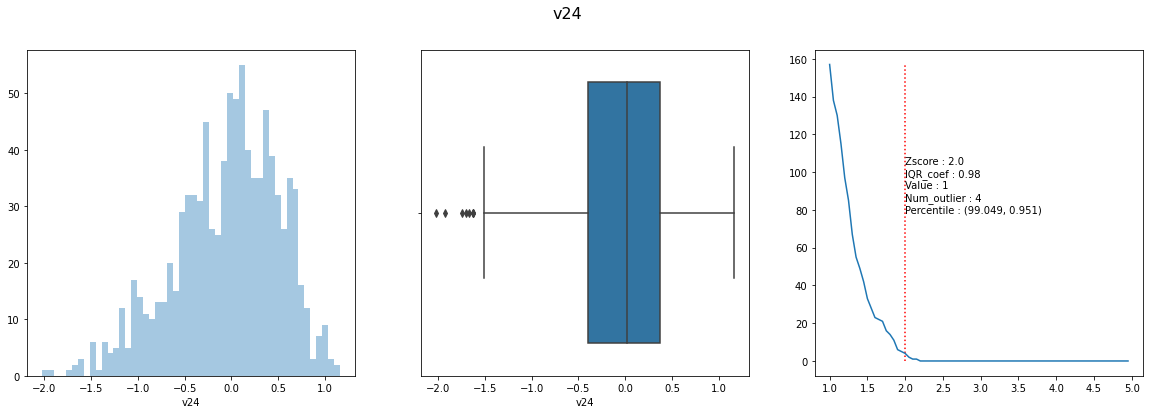

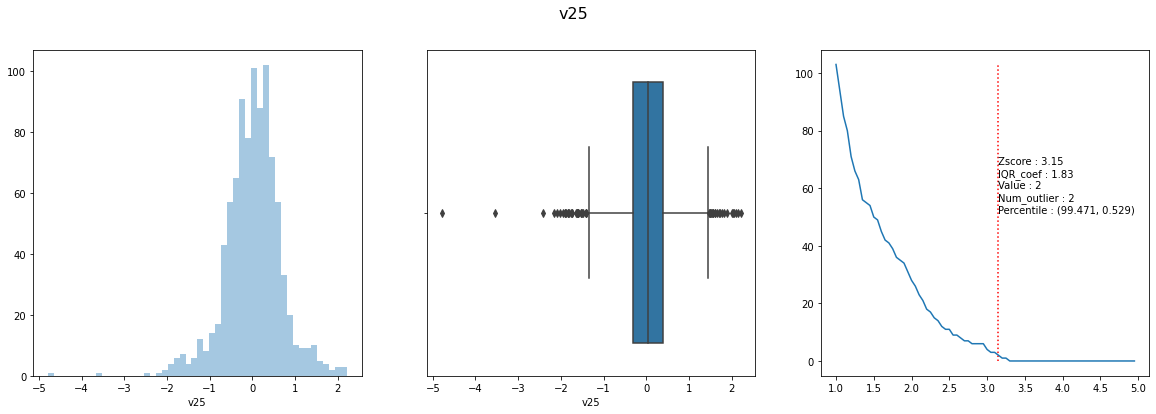

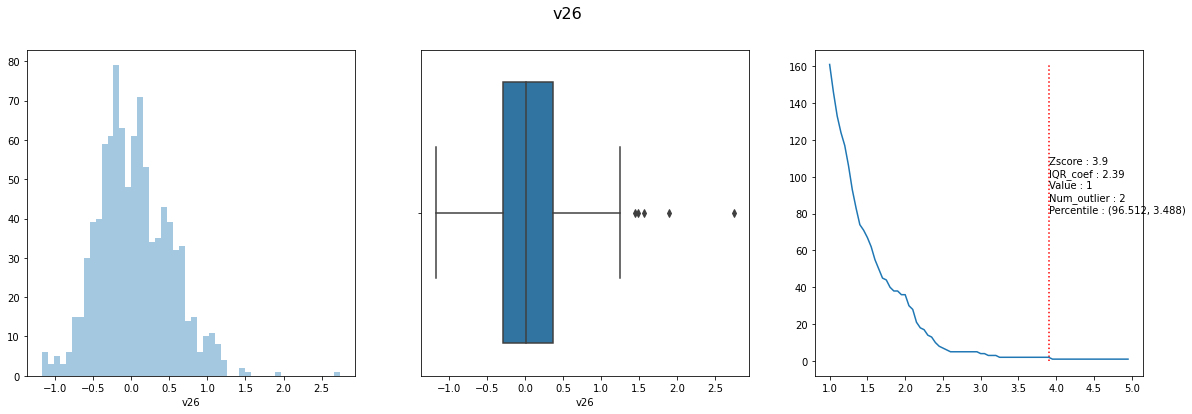

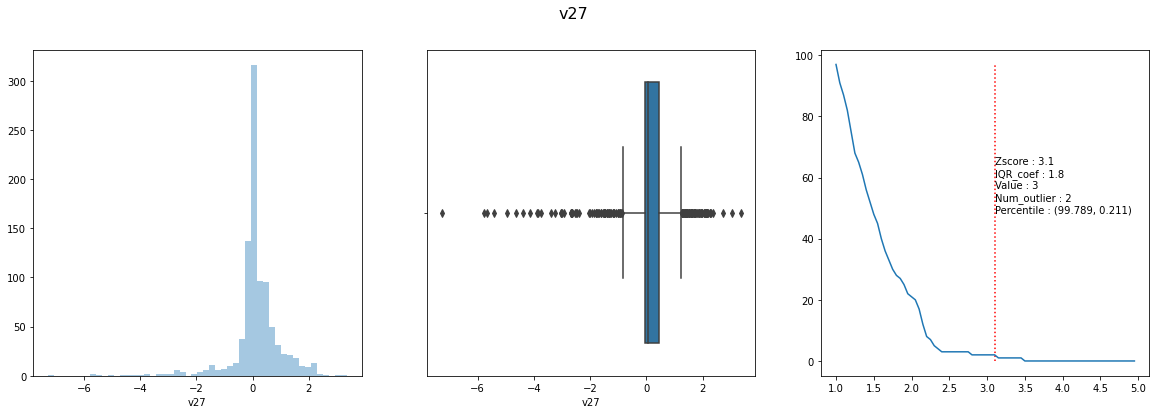

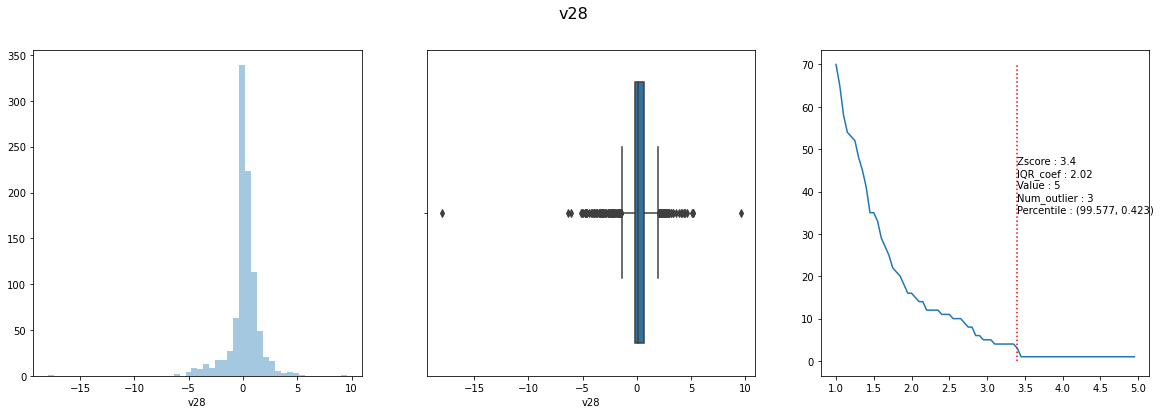

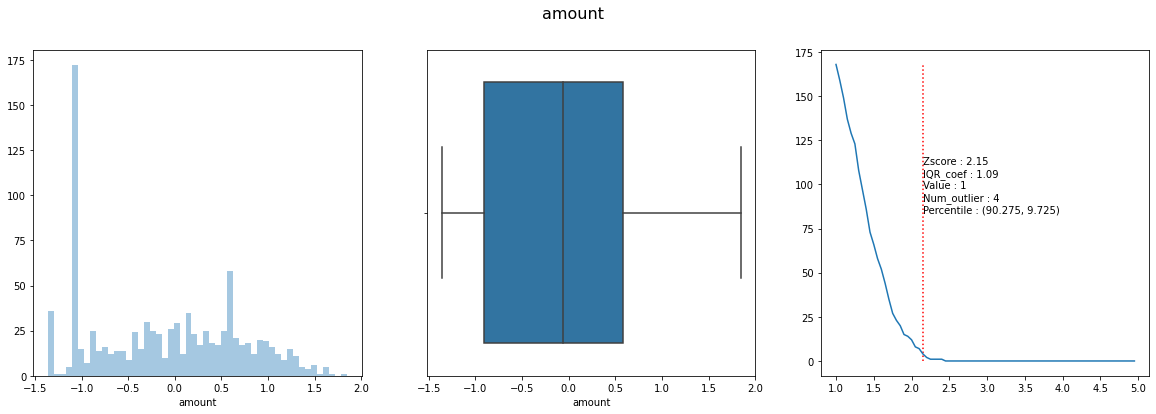

In [59]:
for col in undersampled_df.columns[:30]:
    outlier_inspect(undersampled_df, col)

In [60]:
IQR_coef = 3
z_score = round(0.675 + IQR_coef*1.35, 2)
z_score

4.73

In [61]:
z_score = 3
iqr_coef = round((z_score - 0.675) / 1.35, 2)
iqr_coef

1.72

In [62]:
df_out = undersampled_df.copy()

In [63]:
df_out.shape

(946, 31)

In [64]:
"""This function gives max/min threshold, number of data, number of outlier and plots its boxplot,
according to the tree type and the entered z-score value for the relevant column."""

def num_outliers(df, col, whis = 1.5):
    q1 = df.groupby("class")[col].quantile(0.25)
    q3 = df.groupby("class")[col].quantile(0.75)
    iqr = q3 - q1
    print("Column_name :", col)
    print("whis :", whis)
    print("-------------------------------------------")
    for i in np.sort(df['class'].unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        print("min_threshold:", min_threshold, "\nmax_threshold:", max_threshold)
        num_outliers = len(df[df["class"]==i][col][(df[col]<min_threshold) | (df[col]>max_threshold)])
        print(f"Num_of_values for {i} :", len(df[df["class"]==i]))
        print(f"Num_of_outliers for {i} :", num_outliers)
        print("-------------------------------------------")
    return sns.boxplot(y = df[col], x = df["class"], whis=whis)

In [65]:
"""This function assigns the NaN-value first and then drop related rows, according to the tree type and the entered
whis value and plots the boxplot for the relevant column. """

def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("class")[col].quantile(0.25)
    q3 = df.groupby("class")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df['class'].unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["class"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
    return sns.boxplot(y = df[col], x = df["class"], whis=whis)

In [66]:
df_out.shape

(946, 31)

In [67]:
df_out[target].value_counts()

1    473
0    473
Name: class, dtype: int64

In [68]:
df_out.isnull().sum().sum()

0

Column_name : v1
whis : 3
-------------------------------------------
min_threshold: -5.151187726240186 
max_threshold: 5.113126368469018
Num_of_values for 0 : 473
Num_of_outliers for 0 : 0
-------------------------------------------
min_threshold: -7.331178479271682 
max_threshold: 4.690593286547775
Num_of_values for 1 : 473
Num_of_outliers for 1 : 0
-------------------------------------------
Column_name : v2
whis : 3
-------------------------------------------
min_threshold: -3.619702118200907 
max_threshold: 3.7365901455344606
Num_of_values for 0 : 473
Num_of_outliers for 0 : 8
-------------------------------------------
min_threshold: -8.219876545376662 
max_threshold: 12.68509255651564
Num_of_values for 1 : 473
Num_of_outliers for 1 : 19
-------------------------------------------
Column_name : v3
whis : 3
-------------------------------------------
min_threshold: -4.624037718250522 
max_threshold: 4.494564622314163
Num_of_values for 0 : 473
Num_of_outliers for 0 : 0
------------

min_threshold: -3.820959649668113 
max_threshold: 3.614825181625825
Num_of_values for 0 : 473
Num_of_outliers for 0 : 1
-------------------------------------------
min_threshold: -3.936883462190517 
max_threshold: 4.031332325372906
Num_of_values for 1 : 473
Num_of_outliers for 1 : 6
-------------------------------------------
Column_name : v23
whis : 3
-------------------------------------------
min_threshold: -1.8647196366746308 
max_threshold: 1.851258542081143
Num_of_values for 0 : 473
Num_of_outliers for 0 : 17
-------------------------------------------
min_threshold: -3.6177516259003966 
max_threshold: 3.517444515815064
Num_of_values for 1 : 473
Num_of_outliers for 1 : 19
-------------------------------------------
Column_name : v24
whis : 3
-------------------------------------------
min_threshold: -2.7854541306289757 
max_threshold: 2.8851468783356005
Num_of_values for 0 : 473
Num_of_outliers for 0 : 0
-------------------------------------------
min_threshold: -2.59224402176400

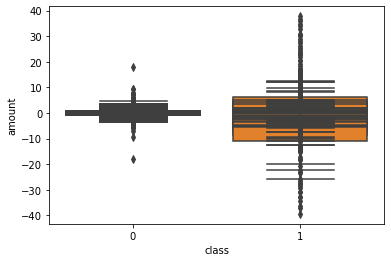

In [69]:
for col in df_out.columns[1:30]:
    num_outliers(df_out, col, whis=3)

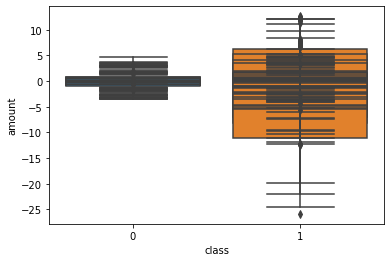

In [70]:
for col in df_out.columns[1:30]:
    remove_outliers(df_out, col, whis=3)

In [71]:
df_out.shape

(946, 31)

In [72]:
df_out[target].value_counts(dropna=False)

1    473
0    473
Name: class, dtype: int64

In [73]:
df_out.isnull().sum().sum()

359

In [74]:
df_out.dropna(inplace=True)

In [75]:
df_out.isnull().sum().sum()

0

In [76]:
df_out.shape

(761, 31)

In [77]:
df_out[target].value_counts(dropna=False)

0    389
1    372
Name: class, dtype: int64

In [78]:
# make_dtype_object = df[['categorical1','categorical2']].astype('object')  
# if we have features need to be dummy!!!

###############################################################################
X_numerical = df_out.drop(target, axis=1).select_dtypes('number').astype('float64')
X_categorical = df_out.drop(target, axis=1).select_dtypes('object')

if (df_out.dtypes==object).any():
    dummied = pd.get_dummies(X_categorical, drop_first=True)
    X = pd.concat([X_numerical, dummied[dummied.columns]], axis=1)
    
else:
    X = df_out.drop(target, axis=1).astype('float64')

y = df_out[target]

###############################################################################
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.20, 
                                                    random_state=42)

###############################################################################
# Columns
X_categorical_list = X_categorical.columns.to_list()
X_numerical_list = X_numerical.columns.to_list()
X_columns_list = X.columns.to_list()

In [79]:
shape_control()

df.shape: (283726, 31)
X.shape: (761, 30)
y.shape: (761,)
X_train.shape: (608, 30)
y_train.shape: (608,)
X_test.shape: (153, 30)
y_test.shape: (153,)


In [80]:
missing_values(X)

,Missing_Number,Missing_Percent


In [81]:
X_train.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
134,-0.312,0.558,-0.233,0.208,0.628,-0.295,0.350,-0.300,0.218,0.507,-0.003,0.730,0.294,-1.519,0.357,-0.401,-0.212,-0.049,-0.389,0.278,-0.229,-0.328,-0.657,0.071,-0.317,0.220,0.215,-0.017,0.014,0.120
274,-0.498,-0.641,0.953,0.978,0.964,-0.169,0.107,0.043,0.520,-0.993,0.014,0.927,1.211,0.895,0.497,0.613,0.212,-0.540,0.740,1.032,0.186,0.103,0.205,-0.179,0.012,-0.224,-0.377,0.294,0.440,-0.860
451,-0.413,-0.464,0.702,0.823,-0.133,0.211,-0.286,0.503,-0.006,-0.700,-0.295,1.273,0.804,0.553,-0.438,0.167,0.739,-0.495,0.407,0.319,0.210,-0.307,-0.600,-0.133,-0.035,-0.132,0.073,0.245,0.277,-0.980
9,0.809,-0.075,-0.408,-0.159,0.237,0.507,-0.332,-0.045,-0.433,-1.390,1.268,-1.169,-1.033,0.343,0.145,1.755,-2.510,0.552,1.774,1.773,0.114,0.043,0.655,0.226,0.530,-1.283,1.015,0.076,0.179,0.052
126,0.636,-0.671,-0.399,1.306,-1.258,-0.475,1.737,-1.100,0.875,1.192,0.387,-1.549,0.600,0.582,-1.732,-1.335,-2.617,1.248,-0.067,-1.842,-0.579,-0.153,0.903,0.414,-0.290,-1.483,0.630,0.451,1.310,0.009


In [82]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [83]:
X_train

array([[-0.31220455,  0.55812413, -0.23293724, ..., -0.01696823,
         0.01444875,  0.11950403],
       [-0.49838853, -0.64134044,  0.95273482, ...,  0.29441413,
         0.43957287, -0.86026669],
       [-0.41343467, -0.46438841,  0.70221619, ...,  0.24461098,
         0.27736928, -0.98030304],
       ...,
       [ 0.69036616, -2.09410143,  0.16320782, ...,  0.58048672,
        -0.53721874, -0.34657179],
       [-0.51173859, -2.10837039,  3.32492963, ...,  2.24509147,
         1.52045386,  0.53078047],
       [ 0.69179988,  1.2060883 , -0.42888469, ..., -0.03509801,
        -0.03923973,  0.57235943]])

## 2.2 Train-Test Split|Scale|OneHotEncoder

In [84]:
ohe = OneHotEncoder(sparse=False, drop="if_binary")
ohe_df = ohe.fit_transform(df_[X_categorical.columns])
ohe_df = pd.DataFrame(ohe_df, columns=ohe.get_feature_names(df_[X_categorical.columns].columns))

In this study, even if we do NOT need to use OneHotEncoder (OHE) since there is NOT any categorical variable, the following OHE codes will be put down in case they could be used for further studies. 


---
---


# 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

 ## 3.1 General Insights to Model Selection

### 3.1.1 Model Selection with Overall Train Validation Scores: Entry Method

In [85]:
def model_selection(X_train, y_train):
    # Logistic Regression
    log = LogisticRegression(class_weight="balanced", random_state=42)
    log.fit(X_train, y_train)
    # Decision Tree
    decision_tree = DecisionTreeClassifier(class_weight="balanced", random_state=42)
    decision_tree.fit(X_train, y_train)
    # Random Forest
    random_forest = RandomForestClassifier(class_weight="balanced", random_state=42)
    random_forest.fit(X_train, y_train)
    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    # SVC
    svc = SVC(class_weight="balanced", random_state=42)
    svc.fit(X_train, y_train)
    # XGB
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    # AdaBoosting
    ab = AdaBoostClassifier(random_state=42)
    ab.fit(X_train, y_train)
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=42)
    gb.fit(X_train, y_train)
#     # AdaCost
#     adac = AdaCost(algorithm = "SAMME", cost_matrix = cost_matrix, random_state=42)
#     adac.fit(X_train, y_train)
   

    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    print(f"\033[1m2) Decision Tree Training Accuracy:\033[0m {decision_tree.score(X_train, y_train)}")
    print(f"\033[1m3) Random Forest Training Accuracy:\033[0m {random_forest.score(X_train, y_train)}")
    print(f"\033[1m4) KNN Training Accuracy:\033[0m {knn.score(X_train, y_train)}")
    print(f"\033[1m5) SVC Training Accuracy:\033[0m {svc.score(X_train, y_train)}")
    print(f"\033[1m6) XGBoosting Training Accuracy:\033[0m {xgb.score(X_train, y_train)}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab.score(X_train, y_train)}")
    print(f"\033[1m8) GradiendBoosting Training Accuracy:\033[0m {gb.score(X_train, y_train)}")
    #print(f"\033[1m9) AdaCost Training Accuracy:\033[0m {adac.score(X_train, y_train)}")
    return log, decision_tree, random_forest, knn, svc, xgb, ab, gb #, adac

In [86]:
model_selection(X_train, y_train)

1) Logistic Regression Training Accuracy: 0.9671052631578947
2) Decision Tree Training Accuracy: 1.0
3) Random Forest Training Accuracy: 1.0
4) KNN Training Accuracy: 0.9457236842105263
5) SVC Training Accuracy: 0.9424342105263158
6) XGBoosting Training Accuracy: 1.0
7) AdaBoosting Training Accuracy: 1.0
8) GradiendBoosting Training Accuracy: 1.0


(LogisticRegression(class_weight='balanced', random_state=42),
 DecisionTreeClassifier(class_weight='balanced', random_state=42),
 RandomForestClassifier(class_weight='balanced', random_state=42),
 KNeighborsClassifier(),
 SVC(class_weight='balanced', random_state=42),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 AdaBoostClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42))

### 3.1.2 Model Selection with Overall Train-Test Scores

In [87]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

In [88]:
transformer = ColumnTransformer([("ohe", OneHotEncoder(drop="if_binary"), X_categorical_list),
                                 ("scaler", StandardScaler(), X_numerical_list)], 
                                 remainder="passthrough")

In [89]:
%matplotlib inline
models = []
models.append(("LOG", LogisticRegression(class_weight="balanced", random_state=42)))
models.append(("DTC", DecisionTreeClassifier(class_weight="balanced", random_state=42)))
models.append(("RFC", RandomForestClassifier(class_weight="balanced", random_state=42)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVC", SVC(class_weight="balanced", random_state=42)))
models.append(("ADA", AdaBoostClassifier(random_state=42)))
models.append(("GBC", GradientBoostingClassifier(random_state=42)))
# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
precision_recall_auc_scores = []

for name, model in models:
    pipe = Pipeline([("model", model)])
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    # calculate the precision-recall auc
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    precision_recall_auc_scores.append(auc(recall, precision))

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall-1": recall_scores,
                        "Precision-0": precision_scores,
                        "ROC AUC": roc_auc_scores,
                        "Recall AUC": precision_recall_auc_scores
                        }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare 

LOG: 0.9159
DTC: 0.916
RFC: 0.9022
KNN: 0.8821
SVC: 0.872
ADA: 0.909
GBC: 0.899


,F1,Recall-1,Precision-0,ROC AUC,Recall AUC
LOG,0.959,0.933,0.939,0.960,0.976
DTC,0.927,0.933,0.935,0.928,0.944
RFC,0.939,0.920,0.926,0.941,0.959
KNN,0.944,0.907,0.917,0.947,0.969
SVC,0.952,0.920,0.928,0.954,0.972
ADA,0.920,0.920,0.923,0.922,0.940
GBC,0.945,0.920,0.927,0.947,0.966


### 3.1.3 Model Selection with Pycaret

In [90]:
# !pip install scikit-learn==0.23.2

In [134]:
from pycaret.classification import *
fraud_classifier = setup(df_out, 
                         target='class',
                         session_id=123,
                         train_size=0.8,
                         log_experiment=True,
                         log_plots=True,
                         html=True,
                         experiment_name='Creditcard Fraud Detection')

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(761, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [135]:
best_model_scores = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9490,0.9802,0.9177,0.9791,0.9470,0.8980,0.9004,3.9810
et,Extra Trees Classifier,0.9392,0.9845,0.8982,0.9789,0.9359,0.8784,0.8825,0.1380
rf,Random Forest Classifier,0.9391,0.9822,0.9047,0.9731,0.9364,0.8783,0.8822,0.2180
lightgbm,Light Gradient Boosting Machine,0.9391,0.9779,0.9048,0.9719,0.9366,0.8783,0.8812,0.2320
catboost,CatBoost Classifier,0.9391,0.9810,0.8982,0.9792,0.9362,0.8782,0.8823,9.2290
ridge,Ridge Classifier,0.9375,0.0000,0.8782,0.9964,0.9331,0.8750,0.8818,0.0450
lda,Linear Discriminant Analysis,0.9375,0.9776,0.8782,0.9964,0.9331,0.8750,0.8818,0.0260
knn,K Neighbors Classifier,0.9326,0.9714,0.8783,0.9854,0.9280,0.8652,0.8712,0.0410
xgboost,Extreme Gradient Boosting,0.9325,0.9748,0.9113,0.9522,0.9309,0.8650,0.8664,0.8080
ada,Ada Boost Classifier,0.9309,0.9687,0.9145,0.9489,0.9299,0.8618,0.8651,0.1060


### 3.1.4 Model Selection for imbalanced data by using "scale_pos_weight" hyperparameter: Catboost, XGBoost, LightGBM

- CatBoost, XGBoost and LightGBM use **`scale_pos_weight`** hyperparameter to tune the training algorithm for the imbalanced data.

- **`scale_pos_weight`** is **1** by default.

- Both major class and minority class get the same weight.

- When dealing with imbalanced data, story changes a bit.
- **`scale_pos_weight`** gets the number of ( total number of examples in the majority class divided by the total number of examples in the minority class.)

- For example, in our data;
     - Number of Class 1, Fraudulent:  473
     - Number of Class 0, Reliable: 283253
     -  **`scale_pos_weight`** should get 283253 / 473  which is almost **600**
     
- By adjusting the weight, minority class gets 600 times more impact and 600 times more correction than errors made on the majority class. 

- Two important point, 
    - by changing **`scale_pos_weight`** we can also see changes on the **`recall, accuracy, roc-auc, precision score`**
    - If we use extreme values for the **`scale_pos_weight`**, we can overfit the minority class and model could make worse predictions.



- https://www.kaggle.com/kaanboke/xgboost-lightgbm-catboost-imbalanced-data

#### 3.1.4.1 Catboost, XGBoost, LightGBM with Default Parameters

In [93]:
comp_recall = []
comp_recall_name = []

In [94]:
models = []
models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0)))
models.append(("LGB", LGBMClassifier(random_state=42)))
models.append(("CAT", CatBoostClassifier(random_state=42,
                                         verbose=0, 
                                         cat_features=X_categorical_list)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
precision_recall_auc_scores = []

for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Default")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train, cat_features=X_categorical_list).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Default")
    
result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall-1": recall_scores,
                        "Precision-0": precision_scores,
                        "ROC AUC": roc_auc_scores,
                        "Recall AUC": precision_recall_auc_scores
                        }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare

XGB MODEL: 0.8987
LGB MODEL: 0.9022
CAT MODEL: 0.892


,F1,Recall-1,Precision-0,ROC AUC,Recall AUC
XGB,0.939,0.920,0.926,0.941,0.959
LGB,0.939,0.920,0.926,0.941,0.959
CAT,0.945,0.920,0.927,0.947,0.966


#### 3.1.4.2 Catboost, XGBoost, LightGBM with scale_pos_weight=2

In [95]:
models = []
models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0, scale_pos_weight = 2)))
models.append(("LGB", LGBMClassifier(random_state=42, scale_pos_weight = 2)))
models.append(("CAT", CatBoostClassifier(random_state=42, 
                                         verbose=0, 
                                         cat_features=X_categorical_list, 
                                         scale_pos_weight = 2)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
precision_recall_auc_scores = []

for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Post Weight 2")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train,cat_features=X_categorical_list).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))      
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Pos Weight 2")    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall-1": recall_scores,
                        "Precision-0": precision_scores,
                        "ROC AUC": roc_auc_scores,
                        "Recall AUC": precision_recall_auc_scores
                        }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare

XGB MODEL: 0.9021
LGB MODEL: 0.9124
CAT MODEL: 0.8989


,F1,Recall-1,Precision-0,ROC AUC,Recall AUC
XGB,0.939,0.920,0.926,0.941,0.959
LGB,0.939,0.920,0.926,0.941,0.959
CAT,0.932,0.920,0.925,0.934,0.952


#### 3.1.4.3 Catboost, XGBoost, LightGBM with scale_post_weight=3

In [96]:
models = []
models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0, scale_pos_weight = 3)))
models.append(("LGB", LGBMClassifier(random_state=42, scale_pos_weight = 3)))
models.append(("CAT", CatBoostClassifier(random_state=42,
                                         verbose=0, 
                                         cat_features=X_categorical_list,
                                         scale_pos_weight = 3)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
precision_recall_auc_scores = []

for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))

        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Pos Weight 3")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train,cat_features=X_categorical_list).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Post Weight 3")
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall-1": recall_scores,
                        "Precision-0": precision_scores,
                        "ROC AUC": roc_auc_scores,
                        "Recall AUC": precision_recall_auc_scores
                        }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare

XGB MODEL: 0.9124
LGB MODEL: 0.909
CAT MODEL: 0.9157


,F1,Recall-1,Precision-0,ROC AUC,Recall AUC
XGB,0.952,0.933,0.938,0.954,0.969
LGB,0.946,0.933,0.938,0.947,0.962
CAT,0.933,0.933,0.936,0.935,0.950


In [97]:
pd.DataFrame(comp_recall, index=comp_recall_name, columns=["Recall"]).sort_values(by="Recall").iplot(kind="barh",
                                                                                                    title="Model Comparison")

# 4. SMOTE

In [98]:
shape_control()

df.shape: (283726, 31)
X.shape: (761, 30)
y.shape: (761,)
X_train.shape: (608, 30)
y_train.shape: (608,)
X_test.shape: (153, 30)
y_test.shape: (153,)


In [108]:
print(pd.DataFrame(y_train).rename({0:"class"}, axis=1)["class"].value_counts())
print(pd.DataFrame(y_test).rename({0:"class"}, axis=1)["class"].value_counts())

0    311
1    297
Name: class, dtype: int64
0    78
1    75
Name: class, dtype: int64


In [110]:
# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [111]:
over_to = 1000
over = SMOTE(sampling_strategy={1:over_to})
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [112]:
X_resampled

array([[-0.31220455,  0.55812413, -0.23293724, ..., -0.01696823,
         0.01444875,  0.11950403],
       [-0.49838853, -0.64134044,  0.95273482, ...,  0.29441413,
         0.43957287, -0.86026669],
       [-0.41343467, -0.46438841,  0.70221619, ...,  0.24461098,
         0.27736928, -0.98030304],
       ...,
       [-0.51120482, -2.6542902 ,  4.91631729, ...,  1.35743736,
         0.76380683,  0.24090292],
       [ 0.7398726 , -0.94346271,  2.99228708, ...,  0.57828429,
         1.21964894,  0.6477868 ],
       [-0.89107537, -1.29344308,  4.85756982, ...,  0.43140189,
         0.98552834, -1.04103373]])

In [113]:
X_resampled=pd.DataFrame(data=X_resampled, index=np.arange(len(X_resampled)), columns=X_columns_list)
y_resampled=pd.DataFrame(data=y_resampled, index=np.arange(len(y_resampled)), columns=["class"])

In [131]:
from imblearn.combine import SMOTEENN,SMOTETomek
from numpy.testing import assert_almost_equal
import numpy.testing as npt
from sklearn.utils.testing import assert_array_almost_equal

ros1 = SMOTETomek()
ros2 = SMOTEENN()
X_resampled_, y_resampled_ = ros1.fit_resample(X_train, y_train)
X_resampled__, y_resampled__ = ros2.fit_resample(X_train, y_train)
# assert_array_almost_equal(X_resampled, X_train)
# npt.assert_array_equal(y_resampled, y_train)

In [133]:
print("Over Sampling:", pd.DataFrame(y_resampled).rename({0:"class"}, axis=1)["class"].value_counts())
print("Omek:", pd.DataFrame(y_resampled_).rename({0:"class"}, axis=1)["class"].value_counts())
print("ENN", pd.DataFrame(y_resampled__).rename({0:"class"}, axis=1)["class"].value_counts())

Over Sampling: 1    1000
0     311
Name: class, dtype: int64
Omek: 1    304
0    304
Name: class, dtype: int64
ENN 1    266
0    266
Name: class, dtype: int64


## 4.1 Logistic Regression Model Evaluating with SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

### 4.1.1 Model Training Prediction and Evaluating

In [ ]:
# Importing the Packages:
from sklearn import linear_model

def objective(trial):

    class_weight = trial.suggest_categorical("class_weight", ("balanced", None))
    penalty = trial.suggest_categorical("penalty", ("l1", "l2", "elasticnet", "none"))
    if penalty == "l1" or penalty == "elasticnet" :
       solver = "saga"
    else:
      solver = "lbfgs"
    l1_ratio = trial.suggest_loguniform("l1_ratio", 1e-7, 1e-3)
    C = trial.suggest_loguniform("C", 1e-7, 1e-3)
    
    clf = LogisticRegression(class_weight=class_weight, 
                             C=C, 
                             solver=solver, 
                             penalty=penalty,
                             l1_ratio=l1_ratio)
    clf.fit(X_resampled, y_resampled)
    val_accuracy = clf.score(X_test_scaled, y_test)

    return val_accuracy


study_log = optuna.create_study(direction="maximize")
study_log.optimize(objective, n_trials=10)

[I 2021-12-21 15:45:21,295] A new study created in memory with name: no-name-2abcf0a2-ea86-4283-a72c-ffcbc27fb31f
[I 2021-12-21 15:45:25,156] Trial 0 finished with value: 0.9994184612131252 and parameters: {'class_weight': None, 'penalty': 'elasticnet', 'l1_ratio': 0.0002708667566640778, 'C': 7.314313057123164e-07}. Best is trial 0 with value: 0.9994184612131252.
[I 2021-12-21 15:45:28,137] Trial 1 finished with value: 0.9703943890318261 and parameters: {'class_weight': 'balanced', 'penalty': 'none', 'l1_ratio': 0.00024676131364129107, 'C': 3.089187771794294e-05}. Best is trial 0 with value: 0.9994184612131252.
[I 2021-12-21 15:45:32,266] Trial 2 finished with value: 0.9993832164381631 and parameters: {'class_weight': None, 'penalty': 'elasticnet', 'l1_ratio': 8.504784195123296e-06, 'C': 1.8108699208346612e-06}. Best is trial 0 with value: 0.9994184612131252.
[I 2021-12-21 15:45:35,170] Trial 3 finished with value: 0.9703943890318261 and parameters: {'class_weight': 'balanced', 'penalt

In [ ]:
print(f'Minimum objective value: {study_log.best_value}')
print(f'Best parameter: {study_log.best_params}')

Minimum objective value: 0.9994184612131252
Best parameter: {'class_weight': None, 'penalty': 'elasticnet', 'l1_ratio': 0.0002708667566640778, 'C': 7.314313057123164e-07}


In [ ]:
def objective(trial):
    class_weight = trial.suggest_categorical("class_weight", ("balanced", None))
    penalty = trial.suggest_categorical("penalty", ("l1", "l2", "elasticnet", "none"))
    if penalty == "l1" or penalty == "elasticnet" :
       solver = "saga"
    else:
      solver = "lbfgs"
    l1_ratio = trial.suggest_loguniform("l1_ratio", 1e-7, 1e-3)
    C = trial.suggest_loguniform("C", 1e-7, 1e-3)
    
    clf = LogisticRegression(class_weight=class_weight, 
                             C=C, 
                             solver=solver, 
                             penalty=penalty,
                             l1_ratio=l1_ratio)
    
      kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
      return sklearn.model_selection.cross_val_score(clf, X_resampled, y_resampled, n_jobs=-1, scoring="recall", cv=kfold).mean()

study_kfold_log = optuna.create_study(direction='maximize')
study_kfold_log.optimize(objective, n_trials=20)

trial = study_kfold_log.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [ ]:
optuna.visualization.plot_optimization_history(study_log)

In [ ]:
optuna.visualization.plot_slice(study_log)

4.1.2 Model tunning|Logistic Regression

In [ ]:
# Model tunning

penalty = study.best_params["penalty"] 
C = study.best_params["C"]
l1_ratio = study.best_params["l1_ratio"]
solver = study.best_params["solver"]
class_weight = study.best_params["class_weight"]

log_tuned_model = LogisticRegression(class_weight=class_weight,
                                     penalty=penalty, 
                                     C=C, 
                                     solver=solver, 
                                     max_iter=5000,
                                     l1_ratio=l1_ratio).fit(X_resampled, y_resampled)
y_test_pred_log = log_tuned_model.predict(X_test_scaled)

KeyError: ignored

### 4.1.3 Confussion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_test, y_test_pred_log)

group_names = ["True Negatives (TN)", 
               "False Positives (FP)\n(Type I Error)", 
               "False Negatives (FN)\n(Type II Error)", 
               "True Positives (TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

### 4.1.4 Classification Report

### 4.1.5 Plot Precision and Recall Curve

In [ ]:
model = log_tuned_model 
plot_roc_curve(model, X_resampled, y_resampled);
plot_precision_recall_curve(model, X_resampled, y_resampled);

### 4.1.6 Best Thresholds

In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

## 4.2 Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

### 4.2.1 Model Training Prediction and Evaluating


In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = trial.suggest_int('max_depth', 1, 32)
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    clf.fit(X_resampled, y_resampled)
    val_accuracy = clf.score(X_test_scaled, y_test)
    return val_accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

In [ ]:
print('Minimum objective value: ' + str(study.best_value))
print('Best parameter: ' + str(study.best_params))

In [ ]:
def objective(trial):
      criterion = trial.suggest_categorical('criterion', ["gini", "entropy"])
      max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
      max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
      bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
      n_estimators = trial.suggest_int('n_estimators', 2, 20)
      max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
      
      rf_clf = sklearn.ensemble.RandomForestClassifier(criterion =criterion,
                                                    max_features =max_features,
                                                    max_leaf_nodes =max_leaf_nodes,
                                                    bootstrap =bootstrap,
                                                    n_estimators=n_estimators, 
                                                    max_depth=max_depth)

      kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
      return sklearn.model_selection.cross_val_score(clf, X_resampled, y_resampled, n_jobs=-1, scoring="recall", cv=kfold).mean()

study_kfold = optuna.create_study(direction='maximize')
study_kfold.optimize(objective, n_trials=20)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [ ]:
optuna.visualization.plot_optimization_history(study)


In [ ]:
optuna.visualization.plot_slice(study)


### 4.2.2 Model tunning|Random Forest

In [ ]:
#Create an instance with tuned hyperparameters
rf_tuned_model = RandomForestClassifier(bootstrap=study.best_params['bootstrap'], 
                                        criterion=study.best_params['criterion'],
                                        max_depth=study.best_params['max_depth'],
                                        max_features=study.best_params['max_features'],
                                        max_leaf_nodes=study.best_params['max_leaf_nodes'],
                                        n_estimators=study.best_params['n_estimators'],
                                        n_jobs=-1).fit(X_resampled, y_resampled)

y_test_pred_rf = rf_tuned_model.predict(X_test_scaled)

### 4.2.3 Confussion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Negatives (TN)", 
               "False Positives (FP)\n(Type I Error)", 
               "False Negatives (FN)\n(Type II Error)", 
               "True Positives (TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

### 4.2.4 Classification Report

### 4.2.5 Plot Precision and Recall Curve

In [ ]:
model = log_tuned_model 
plot_roc_curve(model, X_resampled, y_resampled);
plot_precision_recall_curve(model, X_resampled, y_resampled);

## 4.3 Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

***iii. Compile Model***

***iv. Fit Model***

***v. Prediction and Model Evaluating***

***vi. Plot Precision and Recall Curve***

# 5. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [ ]:
rf_tuned_model = pickle.dump(rf_tuned_model, open('rf_tuned_model', 'wb'))

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___